# Are there trends between geographical regions and homicide rates and suspicious clusters of murders within each region?

<b>The purpose</b> of this project is to aid law enforcement to identify suspicious clusters with high murder rate as well as predict demographic information for unsolved murder cases. By doing so, law enforcemnet officers, let it be detectives or regular police officers, could gain new insights into cold cases and potentially draw attention to missed out details of suspect/case backgrounds and eventually breaking the "stalemate". 

<b>We utilized Linear Regression, Random Forest, PCA, and KNNs</b> to predict suspect demographics, identify geographic clusters of cases, as well as trends in homicide cases over time. The rest of the colab notebook documents our process and methodologies in data cleaning, feature extraction, and optimization in modeling. The outputs and results of each sub-exploration is at the end of the notebook, it will be a long scroll!



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('SHR65_23.csv')
df.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
0,197603001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,March,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
1,197604001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,April,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
2,197606001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Other,NaN,0,0,30180.0,"Anchorage, AK"
3,197606002AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
4,197607001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,July,...,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"


In [ ]:
df['State'].value_counts()

State
California              129741
Texas                    86288
New York                 62695
Florida                  50854
Illinois                 39227
Michigan                 38641
Pennsylvania             34307
Georgia                  29698
North Carolina           29460
Ohio                     28230
Louisiana                27411
Maryland                 23742
Missouri                 22456
Virginia                 22454
Tennessee                22310
New Jersey               18750
Alabama                  18169
Arizona                  18068
South Carolina           17677
Indiana                  16723
Oklahoma                 12518
Washington               11263
Kentucky                 10877
Arkansas                 10223
Colorado                 10134
District of Columbia      9833
Wisconsin                 9673
Mississippi               8946
Massachusetts             8180
Nevada                    8068
Connecticut               6542
New Mexico                6310
Or

In [ ]:
print(df.info())
print(df.describe())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894636 entries, 0 to 894635
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            894636 non-null  object 
 1   CNTYFIPS      894636 non-null  object 
 2   Ori           894636 non-null  object 
 3   State         894636 non-null  object 
 4   Agency        894636 non-null  object 
 5   Agentype      894636 non-null  object 
 6   Source        894636 non-null  object 
 7   Solved        894636 non-null  object 
 8   Year          894636 non-null  int64  
 9   Month         894636 non-null  object 
 10  Incident      894636 non-null  int64  
 11  ActionType    894636 non-null  object 
 12  Homicide      894636 non-null  object 
 13  Situation     894636 non-null  object 
 14  VicAge        894636 non-null  int64  
 15  VicSex        894636 non-null  object 
 16  VicRace       894636 non-null  object 
 17  VicEthnic     894636 non-null  object 
 18  OffA

In [ ]:
df.isnull().sum()

ID                   0
CNTYFIPS             0
Ori                  0
State                0
Agency               0
Agentype             0
Source               0
Solved               0
Year                 0
Month                0
Incident             0
ActionType           0
Homicide             0
Situation            0
VicAge               0
VicSex               0
VicRace              0
VicEthnic            0
OffAge               0
OffSex               0
OffRace              0
OffEthnic            0
Weapon               0
Relationship         0
Circumstance         0
Subcircum       859886
VicCount             0
OffCount             0
FileDate         17075
MSA                  0
dtype: int64

In [ ]:
df_new= df.drop(['Subcircum', 'FileDate'], axis='columns')
df_new.isnull().sum()

ID              0
CNTYFIPS        0
Ori             0
State           0
Agency          0
Agentype        0
Source          0
Solved          0
Year            0
Month           0
Incident        0
ActionType      0
Homicide        0
Situation       0
VicAge          0
VicSex          0
VicRace         0
VicEthnic       0
OffAge          0
OffSex          0
OffRace         0
OffEthnic       0
Weapon          0
Relationship    0
Circumstance    0
VicCount        0
OffCount        0
MSA             0
dtype: int64

In [ ]:
df_new.dropna(inplace=True)
df_new.isnull().sum()

ID              0
CNTYFIPS        0
Ori             0
State           0
Agency          0
Agentype        0
Source          0
Solved          0
Year            0
Month           0
Incident        0
ActionType      0
Homicide        0
Situation       0
VicAge          0
VicSex          0
VicRace         0
VicEthnic       0
OffAge          0
OffSex          0
OffRace         0
OffEthnic       0
Weapon          0
Relationship    0
Circumstance    0
VicCount        0
OffCount        0
MSA             0
dtype: int64

In [ ]:
df_new.shape

(894636, 28)

In [ ]:
df.columns

Index(['ID', 'CNTYFIPS', 'Ori', 'State', 'Agency', 'Agentype', 'Source',
       'Solved', 'Year', 'Month', 'Incident', 'ActionType', 'Homicide',
       'Situation', 'VicAge', 'VicSex', 'VicRace', 'VicEthnic', 'OffAge',
       'OffSex', 'OffRace', 'OffEthnic', 'Weapon', 'Relationship',
       'Circumstance', 'Subcircum', 'VicCount', 'OffCount', 'FileDate', 'MSA'],
      dtype='object')

In [ ]:
df['Weapon'].value_counts()

Weapon
Handgun - pistol, revolver, etc         429715
Knife or cutting instrument             124882
Firearm, type not stated                 92766
Other or type unknown                    51043
Personal weapons, includes beating       49469
Shotgun                                  39915
Blunt object - hammer, club, etc         37262
Rifle                                    32461
Strangulation - hanging                  10157
Fire                                      8207
Asphyxiation - includes death by gas      5377
Other gun                                 4456
Narcotics or drugs, sleeping pills        3987
Weapon Not Reported                       1881
Drowning                                  1515
Poison - does not include gas              645
Explosives                                 636
Pushed or thrown out window                262
Name: count, dtype: int64

In [ ]:
#sns.countplot(df_new['Weapon'])

In [ ]:
state_to_region = {
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast',

    'Ohio': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Illinois': 'Midwest',
    'Wisconsin': 'Midwest', 'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',

    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South', 'Virginia': 'South',
    'West Virginia': 'South', 'North Carolina': 'South', 'South Carolina': 'South', 'Georgia': 'South',
    'Florida': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'Arkansas': 'South', 'Louisiana': 'South',

    'Montana': 'West', 'Idaho': 'West', 'Wyoming': 'West', 'Colorado': 'West', 'New Mexico': 'West',
    'Arizona': 'West', 'Utah': 'West', 'Nevada': 'West', 'Washington': 'West', 'Oregon': 'West',
    'California': 'West', 'Alaska': 'West', 'Hawaii': 'West'
}
df['Region'] = df['State'].map(state_to_region)

In [ ]:
homicide_counts = df.groupby(['Region', 'Year']).size().reset_index(name='HomicideCount')
print(homicide_counts)

      Region  Year  HomicideCount
0    Midwest  1976           4209
1    Midwest  1977           4081
2    Midwest  1978           4019
3    Midwest  1979           4567
4    Midwest  1980           4670
..       ...   ...            ...
187     West  2019           3500
188     West  2020           4575
189     West  2021           4927
190     West  2022           4873
191     West  2023           4501

[192 rows x 3 columns]


---

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = pd.get_dummies(homicide_counts[['Region', 'Year']], drop_first=True)
y = homicide_counts['HomicideCount']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

print("R-squared on test set:", model.score(X_test, y_test))

R-squared on test set: 0.7998270432167894


In [ ]:
results = {}

for region in homicide_counts['Region'].unique():

    # subset to this region
    new_df = homicide_counts[homicide_counts['Region'] == region]

    X = new_df[['Year']]
    y = new_df['HomicideCount']

    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42, test_size=0.2)

    # fitting the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(X, y)

    results[region] = {
        'Slope': slope,
        'Intercept': intercept,
        'R_squared': r_squared
    }

results_df = pd.DataFrame(results).T
print(results_df)

               Slope     Intercept  R_squared
Midwest    -3.104798   9830.298788   0.008350
Northeast -35.466910  73734.341937   0.579412
South       3.627895    943.334073  -0.018787
West       -8.719894  21649.037465   0.066501


c:\Users\elain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\elain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\elain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\elain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

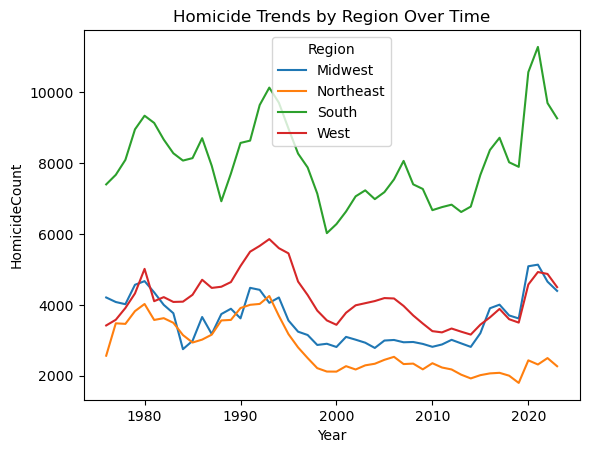

In [ ]:
sns.lineplot(data=homicide_counts, x='Year', y='HomicideCount', hue='Region')
plt.title('Homicide Trends by Region Over Time')
plt.show()

So in our analysis above, we calculate the R-squared values of our linear regression models, which measures how much of the variation in homicide counts across time can be predicted or explained with our model. We got an output / R-squared value of 0.7998 while analyzing our entire dataset (all four regions combined), which means about 80% of the variations in homicide counts can be accounted for based on which region the data point is from (via dummy variables) and the year.

In general, the closer R-squared is to 1, the better the model fits, and in our case here R-squared is pretty high, which tells us that region and time together is decently helpful in predicting homicide counts, but it doesn’t tell us which part is doing the heavy lifting (region vs. year). However, we believe that most of the power probably comes from region, since some areas just have more homicides than others.

So then we looked at each region on its own to see how well the year predicts homocide count for each region by fitting homicide count versus year. From our output results that showed slope, intercept and R-squared for each region, only the Northeast had a decent R² ( about 0.58) with a negative slope of about −35 per year, which tells us that the number of homocides in the Northeast have dropped quite steadily through time. However, in the other three regions, the R-squared values are basically zero (and for the South it was even slightly negative), which tells us that for those regions, there are no clear linear trends for homocide count versus year.

Overall, what this means is that only in the Northeast do homicides show a clear downward trend through time. In all the other regions, year on its own doesn’t do a good job of predicting how many homicides happen, and we would need more factors (e.g. city-level breakdowns, demographics, socioeconomic policies etc.) to explain the variance in the homocide counts.

Lastly, the above shows us that yes, most of the predictive accuracy for homocide counts (based on year and region) comes from region.

---

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

categorical_cols = ['State', 'Region', 'Agency', 'Agentype', 'Source', 'Month']
label_encoders = {} #encode categorical var
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df[['State', 'Region', 'Agency', 'Agentype', 'Source', 'Year', 'Month']]
Y = df['Solved']

if Y.dtype == 'object' or Y.nunique() > 2: #encode solved column
    Y = LabelEncoder().fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # split data
cfr = RandomForestClassifier(n_estimators=50, max_depth = 20, min_samples_leaf=2, min_samples_split=2, random_state=0)
cfr.fit(X_train, Y_train)
Y_pred = cfr.predict(X_test)

# # Grid search for hyperparameter tuning - commented out to reduce runtime
# param_grid = {
#     'n_estimators': [50],        # num trees
#     'max_depth': [10, 20],         # max depth
#     'min_samples_split': [2, 5],         # min samples to split
#     'min_samples_leaf': [1, 2]           # min samples for leaf
# }
# grid_search = GridSearchCV(
#     estimator=cfr,
#     param_grid=param_grid,
#     cv=5,
#     n_jobs=-1,
#     verbose=2,
#     scoring='accuracy'
# )
# grid_search.fit(X_train, Y_train)
# print("Best parameters found: ", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# best_cfr = grid_search.best_estimator_
# Y_pred = best_cfr.predict(X_test)
# print("Test Accuracy:", accuracy_score(Y_test, Y_pred))

print("Test Accuracy:", accuracy_score(Y_test, Y_pred))
print(f'Classification report: {classification_report(Y_test, Y_pred)}')
print(f'Confusion matrix: {confusion_matrix(Y_test, Y_pred)}')
feature_importances = cfr.feature_importances_
feature_importances = [round(importance, 4) for importance in feature_importances]
print(f'Feature importances: {feature_importances}')

Test Accuracy: 0.7297795761423589
Classification report:               precision    recall  f1-score   support

           0       0.60      0.24      0.35     52565
           1       0.75      0.93      0.83    126363

    accuracy                           0.73    178928
   macro avg       0.67      0.59      0.59    178928
weighted avg       0.70      0.73      0.69    178928

Confusion matrix: [[ 12872  39693]
 [  8657 117706]]
Feature importances: [0.1552, 0.0382, 0.3447, 0.0463, 0.004, 0.2839, 0.1278]


We were also curious to see if you could use location, agency, and time to predict whether a case was solved or not. A random forest regression model was trained using the State, Region, Agency, Agentype, Source, Year, and Month columns as predictors and the Solved column as the response.

To tune the hyperparameters, we used grid search with 5-fold cross-validation. We found that the best hyperparameters used 50 estimators in the ensemble, a max depth of 20, and min samples of 2. Looking at the overall accuracy, it correctly predicted 73% of all cases. The confusion matrix shows us that ~13,000 cases were correctly predicted as unsolved, almost 40,000 cases were incorrectly predicted as solved when they were unsolved, almost 9,000 cases were incorrectly predicted as unsolved when they were solved, and almost 120,000 cases were correctly predicted as solved. This tells us that out of all the cases, a minority were incorrectly predicted, though the model is worse at predicting unsolved cases as solved cases.

In the linear regression model, we werent able to determine whether region or time was more important in predicting homicide counts. Looking at the feature importances in the random forest regression model, we can see that Agency and Year are the most important features, while Region and Source are less important in determining whether a case was solved or not.

Overall, location, agency, and time are moderately useful in predicting whether a case was solved or not. To improve the model, we could add more columns such as case details like weapon used, victim information, offender information, etc, though that might also introduce multicollinearity and more noise into the predictions.

---

## Murder Mystery - Who are the <b>suspects on the run</b> in unsolved cases in South Eastern States?


### Data Cleaning - Renaming, dropping null value columns, and dropping useless columns

In [ ]:
rename_columns = {
    'CNTYFIPS': 'CountyFIPS',
    'Ori': 'OriginatingAgencyID',
    'Agency': 'AgencyName',
    'Agentype': 'AgencyType',
    'Source': 'SourceAgency',
    'Solved': 'SolvedStatus',
    'Year': 'YearReported',
    'Month': 'MonthReported',
    'Incident': 'IncidentID',
    'ActionType': 'ReportActionType',
    'Homicide': 'HomicideType',
    'Situation': 'CrimeSituation',
    'VicAge': 'VictimAge',
    'VicSex': 'VictimSex',
    'VicRace': 'VictimRace',
    'VicEthnic': 'VictimEthnicity',
    'OffAge': 'OffenderAge',
    'OffSex': 'OffenderSex',
    'OffRace': 'OffenderRace',
    'OffEthnic': 'OffenderEthnicity',
    'Weapon': 'WeaponUsed',
    'Relationship': 'VictimOffenderRelationship',
    'Circumstance': 'CrimeCircumstance',
    'Subcircum': 'CrimeSubCircumstance',
    'VicCount': 'AdditionalVictimCount',
    'OffCount': 'AdditionalOffenderCount',
    'FileDate': 'RecordFileDate',
    'MSA': 'MetropolitanArea'
}

df.rename(columns=rename_columns, inplace=True)

# Drop useless or high-null columns
columns_to_drop = ['CrimeSubCircumstance', 'OriginatingAgencyID', 'SourceAgency','RecordFileDate', 'ID', 'OffenderEthnicity']
df.drop(columns=columns_to_drop, inplace=True)

df


,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,VictimEthnicity,OffenderAge,OffenderSex,OffenderRace,WeaponUsed,VictimOffenderRelationship,CrimeCircumstance,AdditionalVictimCount,AdditionalOffenderCount,MetropolitanArea
0,"Anchorage, AK",Alaska,Anchorage,Municipal police,Yes,1976,March,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,68,Male,Black,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,0,0,"Anchorage, AK"
1,"Anchorage, AK",Alaska,Anchorage,Municipal police,Yes,1976,April,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,44,Male,White,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,0,0,"Anchorage, AK"
2,"Anchorage, AK",Alaska,Anchorage,Municipal police,Yes,1976,June,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,27,Male,Black,"Handgun - pistol, revolver, etc",Stranger,Other,0,0,"Anchorage, AK"
3,"Anchorage, AK",Alaska,Anchorage,Municipal police,Yes,1976,June,2,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,34,Male,White,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,0,0,"Anchorage, AK"
4,"Anchorage, AK",Alaska,Anchorage,Municipal police,Yes,1976,July,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,37,Female,American Indian or Alaskan Native,Knife or cutting instrument,Brother,Other arguments,0,0,"Anchorage, AK"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894631,"Fremont, WY",Wyoming,Wind River Agency,Tribal,No,2018,August,1,Normal update,Murder and non-negligent manslaughter,...,Not of Hispanic origin,999,Unknown,Unknown,Shotgun,Other - known to victim,Narcotic drug laws,0,0,Rural Wyoming
894632,"Fremont, WY",Wyoming,Wind River Agency,Tribal,Yes,2019,August,1,Normal update,Murder and non-negligent manslaughter,...,Not of Hispanic origin,30,Male,American Indian or Alaskan Native,"Firearm, type not stated",Acquaintance,Other,0,0,Rural Wyoming
894633,"Fremont, WY",Wyoming,Wind River Agency,Tribal,Yes,2023,March,2,Normal update,Murder and non-negligent manslaughter,...,Not of Hispanic origin,33,Male,American Indian or Alaskan Native,"Firearm, type not stated",Other - known to victim,Circumstances undetermined,0,0,Rural Wyoming
894634,"Fremont, WY",Wyoming,Wind River Agency,Tribal,Yes,2023,March,1,Normal update,Murder and non-negligent manslaughter,...,Not of Hispanic origin,29,Male,American Indian or Alaskan Native,Other or type unknown,Relationship not determined,Other,0,0,Rural Wyoming


In [ ]:
print(df['CrimeCircumstance'].value_counts(), '\n')
print(df['CrimeSituation'].value_counts())

CrimeCircumstance
Circumstances undetermined              249629
Other arguments                         226885
Other                                   115227
Robbery                                  62407
Narcotic drug laws                       32289
Other - not specified                    31591
Juvenile gang killings                   25999
Felon killed by police                   19007
Brawl due to influence of alcohol        16340
Argument over money or property          16015
Felon killed by private citizen          15758
All suspected felony type                13862
Lovers triangle                          12707
All other manslaughter by negligence     12214
Burglary                                  6910
Gangland killings                         6860
Brawl due to influence of narcotics       5257
Arson                                     5162
Other negligent handling of gun           4680
Rape                                      4281
Children playing with gun                 

### Cleaning outliers in the age variable

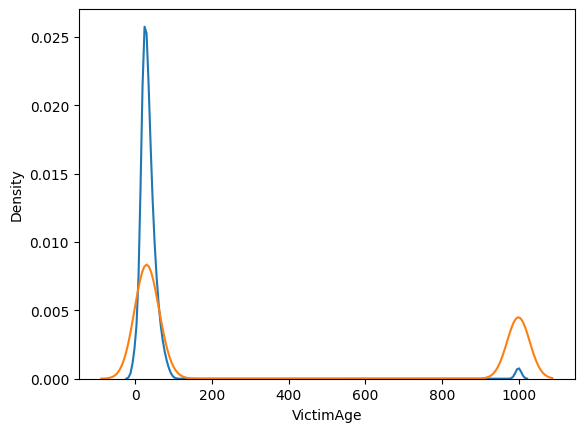

In [ ]:
# cleaning the age variable
sns.kdeplot(df['VictimAge'])
sns.kdeplot(df['OffenderAge'])
plt.show()

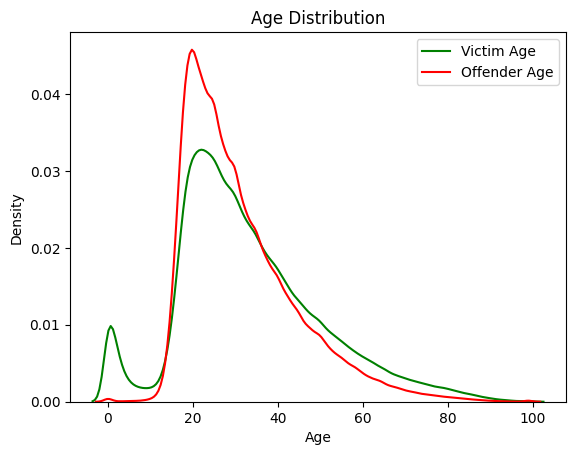

In [ ]:
df = df[df['VictimAge'] != 999]
df = df[df['OffenderAge'] != 999]
sns.kdeplot(df['VictimAge'], color='green', label='Victim Age')
sns.kdeplot(df['OffenderAge'], color='red', label='Offender Age')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()

### Find out about what's missing in the unsolved cases in the demographic dataset

In [ ]:
df_unsolved = df[df['SolvedStatus'] == 'No']
df_unsolved.head(5)

,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,VictimEthnicity,OffenderAge,OffenderSex,OffenderRace,WeaponUsed,VictimOffenderRelationship,CrimeCircumstance,AdditionalVictimCount,AdditionalOffenderCount,MetropolitanArea
673,"Anchorage, AK",Alaska,Anchorage,Municipal police,No,2012,July,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,28,Unknown,Unknown,"Firearm, type not stated",Stranger,Felon killed by private citizen,0,1,"Anchorage, AK"
1403,"Aleutians West, AK",Alaska,Unalaska,Municipal police,No,2012,February,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,34,Unknown,Unknown,"Personal weapons, includes beating",Acquaintance,Other arguments,0,1,Rural Alaska
2309,"Anchorage, AK",Alaska,Alaska State Troopers,Primary state LE,No,2019,December,2,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,99,Unknown,Unknown,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,0,0,"Anchorage, AK"
4482,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1989,November,5,Adjustment,Murder and non-negligent manslaughter,...,Unknown or not reported,20,Unknown,Unknown,"Handgun - pistol, revolver, etc",Relationship not determined,Other,0,1,"Birmingham-Hoover, AL"
4625,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,January,5,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,24,Unknown,Unknown,"Handgun - pistol, revolver, etc",Stranger,Circumstances undetermined,0,1,"Birmingham-Hoover, AL"


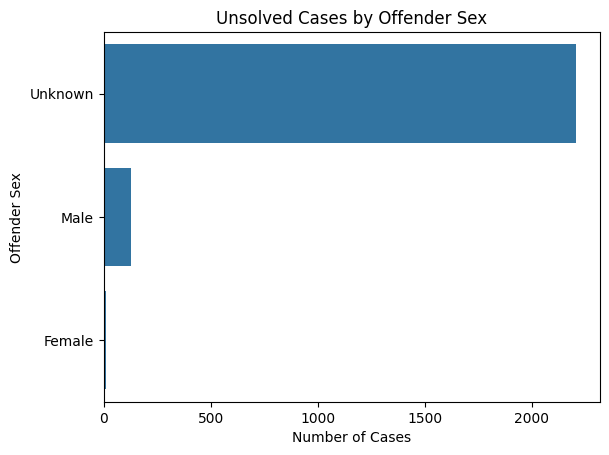

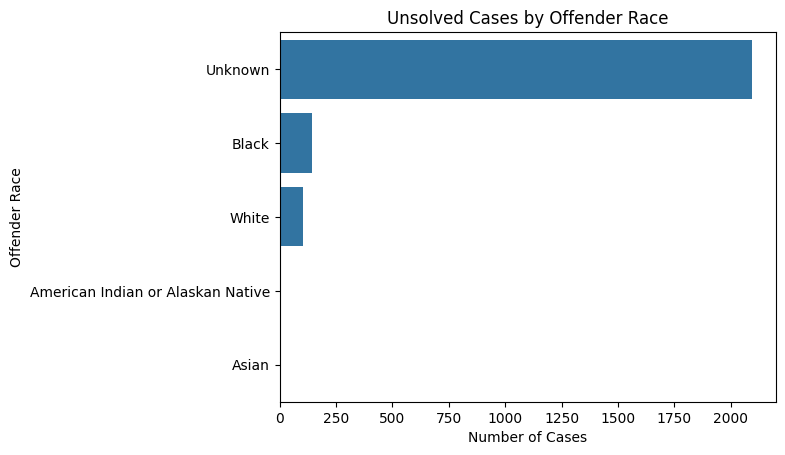

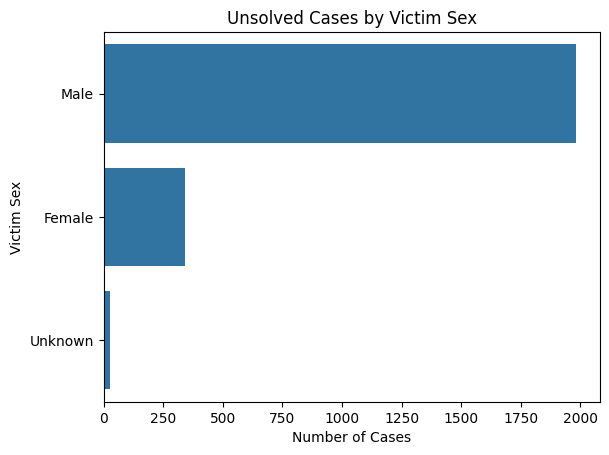

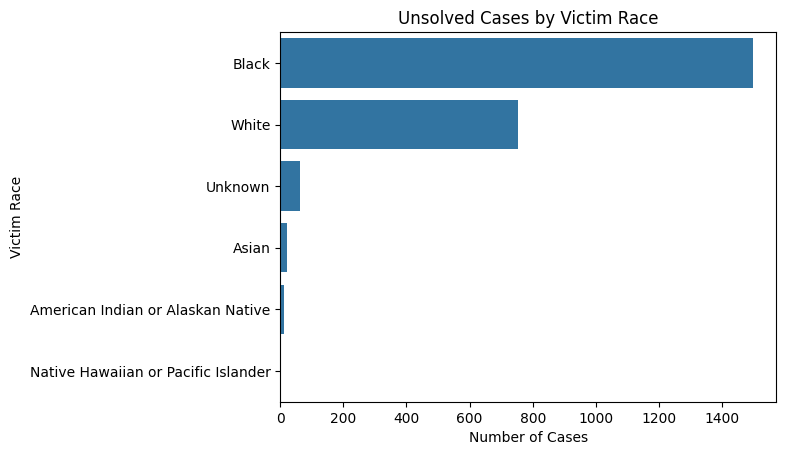

In [ ]:
sex_counts = df_unsolved['OffenderSex'].value_counts().reset_index()
sex_counts.columns = ['OffenderSex', 'CaseCount']
race_counts = df_unsolved['OffenderRace'].value_counts().reset_index()
race_counts.columns = ['OffenderRace', 'CaseCount']

vic_sex_counts = df_unsolved['VictimSex'].value_counts().reset_index()
vic_sex_counts.columns = ['VictimSex', 'CaseCount']

vic_race_counts = df_unsolved['VictimRace'].value_counts().reset_index()
vic_race_counts.columns = ['VictimRace', 'CaseCount']

sns.barplot(data=sex_counts, x='CaseCount', y='OffenderSex', orient='h')
plt.title('Unsolved Cases by Offender Sex')
plt.xlabel('Number of Cases')
plt.ylabel('Offender Sex')
plt.show()

sns.barplot(race_counts,x='CaseCount', y='OffenderRace', orient='h')
plt.title('Unsolved Cases by Offender Race')
plt.xlabel('Number of Cases')
plt.ylabel('Offender Race')
plt.show()

sns.barplot(data=vic_sex_counts, x='CaseCount', y='VictimSex', orient='h')
plt.title('Unsolved Cases by Victim Sex')
plt.xlabel('Number of Cases')
plt.ylabel('Victim Sex')
plt.show()

sns.barplot(vic_race_counts,x='CaseCount', y='VictimRace', orient='h')
plt.title('Unsolved Cases by Victim Race')
plt.xlabel('Number of Cases')
plt.ylabel('Victim Race')
plt.show()


In [ ]:
print(df_unsolved['CrimeSituation'].value_counts(), '\n')
print(df_unsolved['WeaponUsed'].value_counts(), '\n')
print(df_unsolved['VictimOffenderRelationship'].value_counts())


CrimeSituation
Single victim/single offender           1388
Single victim/unknown offender(s)        386
Single victim/multiple offenders         328
Multiple victims/single offender         146
Multiple victims/multiple offenders       60
Multiple victims/unknown offender(s)      41
Name: count, dtype: int64 

WeaponUsed
Firearm, type not stated                880
Handgun - pistol, revolver, etc         816
Other or type unknown                   216
Knife or cutting instrument             139
Other gun                                83
Rifle                                    65
Personal weapons, includes beating       54
Blunt object - hammer, club, etc         38
Shotgun                                  23
Narcotics or drugs, sleeping pills       21
Fire                                      9
Weapon Not Reported                       2
Poison - does not include gas             1
Asphyxiation - includes death by gas      1
Explosives                                1
Name: count, dty

### <b>Predicting demographic features of unsolved cases based off solved cases

#### South Eastern States - predicting Offender Age, Race, Gender, and VictimOffenderRelationship

In [ ]:
df[df['State'].isin(['Virginia', 'Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'West Virginia', 'Tennessee', 'North Carolina', 'South Carolina', 'Maryland'])]

,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,VictimEthnicity,OffenderAge,OffenderSex,OffenderRace,WeaponUsed,VictimOffenderRelationship,CrimeCircumstance,AdditionalVictimCount,AdditionalOffenderCount,MetropolitanArea
2426,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,2,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,37,Female,Black,"Handgun - pistol, revolver, etc",Friend,Brawl due to influence of alcohol,0,0,"Birmingham-Hoover, AL"
2427,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,20,Male,White,Shotgun,Father,Other arguments,0,1,"Birmingham-Hoover, AL"
2428,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,3,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,16,Male,Black,Shotgun,Stranger,Robbery,2,1,"Birmingham-Hoover, AL"
2429,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,3,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,16,Male,Black,Shotgun,Stranger,Robbery,2,1,"Birmingham-Hoover, AL"
2430,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,3,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,16,Male,Black,Shotgun,Stranger,Robbery,2,1,"Birmingham-Hoover, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893700,"Mingo, WV",West Virginia,State Police: Gilbert,Primary state LE,Yes,2006,December,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,46,Male,White,"Firearm, type not stated",Other - known to victim,Felon killed by police,0,0,Rural West Virginia
893701,"Putnam, WV",West Virginia,State Police: Teays Valley,Primary state LE,Yes,2001,April,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,22,Male,White,Knife or cutting instrument,Neighbor,Other,0,0,"Charleston, WV"
893702,"Wood, WV",West Virginia,Sp Bci: Beckley,Primary state LE,Yes,2012,July,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,72,Male,Asian,"Narcotics or drugs, sleeping pills",Stranger,Other,0,0,"Parkersburg-Marietta-Vienna, WV-OH"
893703,"Wood, WV",West Virginia,Sp Bci: Beckley,Primary state LE,Yes,2017,March,1,Normal update,Murder and non-negligent manslaughter,...,Not of Hispanic origin,26,Male,White,"Narcotics or drugs, sleeping pills",Relationship not determined,Narcotic drug laws,0,1,"Parkersburg-Marietta-Vienna, WV-OH"


In [ ]:
df_virginia_solved = df[df['State'].isin(['Virginia', 'Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'West Virginia', 'Tennessee', 'North Carolina', 'South Carolina', 'Maryland']) & (df['SolvedStatus'] == 'Yes')]
df_virginia_solved

,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,VictimEthnicity,OffenderAge,OffenderSex,OffenderRace,WeaponUsed,VictimOffenderRelationship,CrimeCircumstance,AdditionalVictimCount,AdditionalOffenderCount,MetropolitanArea
2426,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,2,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,37,Female,Black,"Handgun - pistol, revolver, etc",Friend,Brawl due to influence of alcohol,0,0,"Birmingham-Hoover, AL"
2427,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,20,Male,White,Shotgun,Father,Other arguments,0,1,"Birmingham-Hoover, AL"
2428,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,3,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,16,Male,Black,Shotgun,Stranger,Robbery,2,1,"Birmingham-Hoover, AL"
2429,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,3,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,16,Male,Black,Shotgun,Stranger,Robbery,2,1,"Birmingham-Hoover, AL"
2430,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,3,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,16,Male,Black,Shotgun,Stranger,Robbery,2,1,"Birmingham-Hoover, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893700,"Mingo, WV",West Virginia,State Police: Gilbert,Primary state LE,Yes,2006,December,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,46,Male,White,"Firearm, type not stated",Other - known to victim,Felon killed by police,0,0,Rural West Virginia
893701,"Putnam, WV",West Virginia,State Police: Teays Valley,Primary state LE,Yes,2001,April,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,22,Male,White,Knife or cutting instrument,Neighbor,Other,0,0,"Charleston, WV"
893702,"Wood, WV",West Virginia,Sp Bci: Beckley,Primary state LE,Yes,2012,July,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,72,Male,Asian,"Narcotics or drugs, sleeping pills",Stranger,Other,0,0,"Parkersburg-Marietta-Vienna, WV-OH"
893703,"Wood, WV",West Virginia,Sp Bci: Beckley,Primary state LE,Yes,2017,March,1,Normal update,Murder and non-negligent manslaughter,...,Not of Hispanic origin,26,Male,White,"Narcotics or drugs, sleeping pills",Relationship not determined,Narcotic drug laws,0,1,"Parkersburg-Marietta-Vienna, WV-OH"


#### Identify and drop the missing values

In [ ]:
df_virginia_solved['VictimSex'] = df_virginia_solved['VictimSex'].replace('Unknown', np.nan)
print(df_virginia_solved['VictimSex'].value_counts(), '\n')

df_virginia_solved['VictimRace'] = df_virginia_solved['VictimRace'].replace('Unknown', np.nan)
print(df_virginia_solved['VictimRace'].value_counts(), '\n')

df_virginia_solved['VictimOffenderRelationship'] = df_virginia_solved['VictimOffenderRelationship'].replace('Relationship not determined', np.nan)
print(df_virginia_solved['VictimOffenderRelationship'].value_counts(), '\n')

df_virginia_solved['WeaponUsed'] = df_virginia_solved['WeaponUsed'].replace('Other or type unknown', np.nan)
print(df_virginia_solved['WeaponUsed'].value_counts(), '\n')

df_virginia_solved['CrimeSituation'] = df_virginia_solved['CrimeSituation'].replace('Unknown', np.nan)
print(df_virginia_solved['CrimeSituation'].value_counts(), '\n')

df_virginia_solved['CrimeCircumstance'] = df_virginia_solved['CrimeCircumstance'].replace('Circumstances undetermined', np.nan)
print(df_virginia_solved['CrimeCircumstance'].value_counts(), '\n')

print(df_virginia_solved['OffenderSex'].value_counts(), '\n')

df_virginia_solved['OffenderRace'] = df_virginia_solved['OffenderRace'].replace('Unknown', np.nan)
print(df_virginia_solved['OffenderRace'].value_counts(), '\n')

print(df_virginia_solved['OffenderAge'].value_counts(), '\n')

print(df_virginia_solved['HomicideType'].value_counts())
df_virginia_solved.dropna(inplace=True)
df_virginia_solved.isnull().sum()

<ipython-input-131-df23f69a10a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_virginia_solved['VictimSex'] = df_virginia_solved['VictimSex'].replace('Unknown', np.nan)
<ipython-input-131-df23f69a10a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_virginia_solved['VictimRace'] = df_virginia_solved['VictimRace'].replace('Unknown', np.nan)
<ipython-input-131-df23f69a10a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

VictimSex
Male      139361
Female     47514
Name: count, dtype: int64 

VictimRace
Black                                  103242
White                                   81074
Asian                                    1129
American Indian or Alaskan Native         641
Native Hawaiian or Pacific Islander        11
Name: count, dtype: int64 

VictimOffenderRelationship
Acquaintance               55879
Stranger                   24691
Wife                       10352
Other - known to victim     7307
Friend                      7248
Girlfriend                  7062
Husband                     4924
Other family                4705
Son                         3751
Boyfriend                   3620
Brother                     2794
Daughter                    2496
Neighbor                    2409
Father                      2214
In-law                      1764
Mother                      1728
Common-law wife              929
Common-law husband           822
Ex-wife                      814
Stepf

<ipython-input-131-df23f69a10a4>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_virginia_solved.dropna(inplace=True)


,0
CountyFIPS,0
State,0
AgencyName,0
AgencyType,0
SolvedStatus,0
YearReported,0
MonthReported,0
IncidentID,0
ReportActionType,0
HomicideType,0


### Train a Random Forest Classifier model to predict offender <b>sex</b> from the solved cases dataset in South Eastern States

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# identify needed features and target variables
features = ['VictimAge', 'VictimSex', 'VictimRace', 'WeaponUsed',
            'VictimOffenderRelationship', 'CrimeCircumstance',
            'CrimeSituation', 'HomicideType']
target = 'OffenderSex'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['VictimSex', 'VictimRace', 'WeaponUsed',
                        'VictimOffenderRelationship',
                         'HomicideType','CrimeCircumstance','CrimeSituation']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# train via randomforest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# evaluate outcome
y_pred = model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print(f'classification report: {classification_report(y_test, y_pred)}\n')
print(f'confusion matrix: {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy score of the random forest classifier is {accuracy:.2f}%')



classification report:               precision    recall  f1-score   support

      Female       0.78      0.57      0.66      3541
        Male       0.93      0.97      0.95     21025

    accuracy                           0.92     24566
   macro avg       0.86      0.77      0.81     24566
weighted avg       0.91      0.92      0.91     24566


confusion matrix: [[ 2020  1521]
 [  562 20463]]

Accuracy score of the random forest classifier is 91.52%


### Predict and impute offender sex from the unsolved South Eastern States Dataset

In [ ]:
# find the unsolved cases dataset for predictive imputation
df_virginia_unsolved = df[df['State'].isin(['Virginia', 'Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'West Virginia', 'Tennessee', 'North Carolina', 'South Carolina', 'Maryland']) & (df['SolvedStatus'] == 'No')].copy()

# df_virginia_unsolved['VictimSex'] = df_virginia_unsolved['VictimSex'].replace('Unknown', np.nan)
# df_virginia_unsolved['VictimRace'] = df_virginia_unsolved['VictimRace'].replace('Unknown', np.nan)
# df_virginia_unsolved['VictimOffenderRelationship'] = df_virginia_unsolved['VictimOffenderRelationship'].replace('Relationship not determined', np.nan)
# df_virginia_unsolved['WeaponUsed'] = df_virginia_unsolved['WeaponUsed'].replace('Other or type unknown', np.nan)
# df_virginia_unsolved['CrimeSituation'] = df_virginia_unsolved['CrimeSituation'].replace('Unknown', np.nan)
# df_virginia_unsolved['CrimeCircumstance'] = df_virginia_unsolved['CrimeCircumstance'].replace('Circumstances undetermined', np.nan)
# df_virginia_unsolved['OffenderRace'] = df_virginia_unsolved['OffenderRace'].replace('Unknown', np.nan)

# one-hot encode categorical variables and combine them together with the continuous variable 'age'
X_unsolved_dummies = df_virginia_unsolved[categorical_features]
X_unsolved_encoded = pd.get_dummies(X_unsolved_dummies, drop_first=True)
X_unsolved_numeric = df_virginia_unsolved[['VictimAge']]

X_unsolved_final = pd.concat([X_unsolved_numeric, X_unsolved_encoded], axis=1)

# align features of the encoded dataset with the training set above so that prediction can be accurately carried out
def align_features(X_train, X_new):
    missing_cols = set(X_train.columns) - set(X_new.columns)
    for col in missing_cols:
        X_new[col] = 0
    extra_cols = set(X_new.columns) - set(X_train.columns)
    X_new = X_new.drop(columns=extra_cols)
    X_new = X_new[X_train.columns]
    return X_new
X_unsolved_final = align_features(X_final, X_unsolved_final)

# predict and fill in the predicted values
unsolved_predictions = model.predict(X_unsolved_final)
df_virginia_unsolved['Predicted_OffenderSex'] = unsolved_predictions
unsolved_probabilities = model.predict_proba(X_unsolved_final)
df_virginia_unsolved['Prob_Male'] = np.round(unsolved_probabilities[:, 1], 2)*100
df_virginia_unsolved['Prob_Female'] = np.round(unsolved_probabilities[:, 0], 2)*100
print(model.classes_)
df_virginia_unsolved.head(10)


['Female' 'Male']


,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,OffenderRace,WeaponUsed,VictimOffenderRelationship,CrimeCircumstance,AdditionalVictimCount,AdditionalOffenderCount,MetropolitanArea,Predicted_OffenderSex,Prob_Male,Prob_Female
4482,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1989,November,5,Adjustment,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Relationship not determined,Other,0,1,"Birmingham-Hoover, AL",Male,100.0,0.0
4625,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,January,5,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Stranger,Circumstances undetermined,0,1,"Birmingham-Hoover, AL",Male,98.0,2.0
4627,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,January,7,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Acquaintance,Other - not specified,0,1,"Birmingham-Hoover, AL",Male,98.0,2.0
4664,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,April,11,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Stranger,Other arguments,0,1,"Birmingham-Hoover, AL",Male,100.0,0.0
4682,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,May,12,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Stranger,Other - not specified,0,1,"Birmingham-Hoover, AL",Male,94.0,6.0
4691,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,June,9,Normal update,Murder and non-negligent manslaughter,...,Unknown,Other or type unknown,Stranger,Other arguments,0,1,"Birmingham-Hoover, AL",Male,100.0,0.0
4692,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,June,10,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Stranger,Circumstances undetermined,0,1,"Birmingham-Hoover, AL",Male,98.0,2.0
4703,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,July,5,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Stranger,Circumstances undetermined,0,1,"Birmingham-Hoover, AL",Male,98.0,2.0
4733,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,October,9,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Stranger,Circumstances undetermined,0,1,"Birmingham-Hoover, AL",Male,98.0,2.0
4759,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,December,8,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Stranger,Circumstances undetermined,0,1,"Birmingham-Hoover, AL",Male,97.0,3.0


 The model is heavily skewed against male offenders, perhaps it is reflective of how the male population could easily become offenders,  more often than women

In [ ]:
df_virginia_unsolved['Predicted_OffenderSex'].value_counts()

,count
Predicted_OffenderSex,
Male,1203
Female,19


### Train a Random Forest Classifier model to predict offender <b>race</b> from the solved cases dataset in South Eastern States

In [ ]:

features = ['VictimAge', 'VictimSex', 'VictimRace', 'WeaponUsed',
            'VictimOffenderRelationship', 'CrimeCircumstance',
            'CrimeSituation', 'HomicideType']
target = 'OffenderRace'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['VictimSex', 'VictimRace', 'WeaponUsed',
                        'VictimOffenderRelationship',
                         'HomicideType','CrimeCircumstance','CrimeSituation']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# train via randomforest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# evaluate outcome
y_pred = model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print(f'Accuracy score of the random forest classifier is {accuracy:.2f}%')


Accuracy score of the random forest classifier is 89.51%


### Predicting and imputing offender race

In [ ]:
# one-hot encode categorical variables and combine them together with the continuous variable 'age'
X_unsolved_dummies = df_virginia_unsolved[categorical_features]
X_unsolved_encoded = pd.get_dummies(X_unsolved_dummies, drop_first=True)
X_unsolved_numeric = df_virginia_unsolved[['VictimAge']]

X_unsolved_final = pd.concat([X_unsolved_numeric, X_unsolved_encoded], axis=1)

# align features of the encoded dataset with the training set above so that prediction can be accurately carried out
def align_features(X_train, X_new):
    missing_cols = set(X_train.columns) - set(X_new.columns)
    for col in missing_cols:
        X_new[col] = 0
    extra_cols = set(X_new.columns) - set(X_train.columns)
    X_new = X_new.drop(columns=extra_cols)
    X_new = X_new[X_train.columns]
    return X_new
X_unsolved_final = align_features(X_final, X_unsolved_final)

# predict and fill in the predicted values
unsolved_predictions = model.predict(X_unsolved_final)
df_virginia_unsolved['Predicted_OffenderRace'] = unsolved_predictions
unsolved_probabilities = model.predict_proba(X_unsolved_final)
df_virginia_unsolved['Prob_Black'] = np.round(unsolved_probabilities[:, 2], 2)*100
df_virginia_unsolved['Prob_White'] = np.round(unsolved_probabilities[:, 3], 2)*100
df_virginia_unsolved['Prob_Asian'] = np.round(unsolved_probabilities[:, 1], 2)*100
df_virginia_unsolved['Prob_American Indian or Alaskan Native'] = np.round(unsolved_probabilities[:, 0], 2)*100
print(model.classes_)
df_virginia_unsolved.head(7)


['American Indian or Alaskan Native' 'Asian' 'Black'
 'Native Hawaiian or Pacific Islander' 'White']


,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,AdditionalOffenderCount,MetropolitanArea,Predicted_OffenderSex,Prob_Male,Prob_Female,Predicted_OffenderRace,Prob_Black,Prob_White,Prob_Asian,Prob_American Indian or Alaskan Native
4482,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1989,November,5,Adjustment,Murder and non-negligent manslaughter,...,1,"Birmingham-Hoover, AL",Male,100.0,0.0,Black,100.0,0.0,0.0,0.0
4625,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,January,5,Normal update,Murder and non-negligent manslaughter,...,1,"Birmingham-Hoover, AL",Male,98.0,2.0,Black,89.0,0.0,0.0,0.0
4627,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,January,7,Normal update,Murder and non-negligent manslaughter,...,1,"Birmingham-Hoover, AL",Male,98.0,2.0,Black,94.0,0.0,0.0,0.0
4664,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,April,11,Normal update,Murder and non-negligent manslaughter,...,1,"Birmingham-Hoover, AL",Male,100.0,0.0,Black,100.0,0.0,0.0,0.0
4682,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,May,12,Normal update,Murder and non-negligent manslaughter,...,1,"Birmingham-Hoover, AL",Male,94.0,6.0,Black,98.0,0.0,0.0,0.0
4691,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,June,9,Normal update,Murder and non-negligent manslaughter,...,1,"Birmingham-Hoover, AL",Male,100.0,0.0,Black,82.0,0.0,1.0,0.0
4692,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,June,10,Normal update,Murder and non-negligent manslaughter,...,1,"Birmingham-Hoover, AL",Male,98.0,2.0,Black,62.0,0.0,0.0,0.0


The model seems to be heavily skewed against white offenders.

In [ ]:
df_virginia_unsolved['Predicted_OffenderRace'].value_counts()

,count
Predicted_OffenderRace,
Black,828
White,369
American Indian or Alaskan Native,17
Asian,8


### Train a Random Forest Regressor Model to predict the exact <b>Age</b> of the offender

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV

# identify needed features and target variables
features = ['VictimAge', 'VictimSex', 'VictimRace', 'WeaponUsed',
            'VictimOffenderRelationship', 'CrimeCircumstance',
            'CrimeSituation', 'HomicideType']
target = 'OffenderAge'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['VictimSex', 'VictimRace', 'WeaponUsed',
                        'VictimOffenderRelationship',
                         'HomicideType','CrimeCircumstance','CrimeSituation']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)s

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

# fine-tuning the regressor to find the best accuracy
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator = RandomForestRegressor(random_state=42),
                           param_grid = parameters,cv=5,
                           n_jobs = -1,
                           verbose = 2,
                           scoring='r2'
                           )

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# train via gridsearch's random forest regressor
grid_search.fit(X_train, y_train)
print('Best Parameters found:', grid_search.best_params_)
print(f'best r^2 score found:{grid_search.best_score_:.2f}%')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# best parameters according to gridsearch outcome:
# {
#     'max_depth': 30,
#     'max_features': 'sqrt',
#     'min_samples_leaf': 1,
#     'min_samples_split': 10,
#     'n_estimators': 300
# }

Turns out that predicting the exact <b>age</b> is extremely difficult as age could have a weak correlation between all of the crime factors given that human behavior is highly random, and that age does not contrain their criminal acts

In [ ]:
final_model_chosen = RandomForestRegressor(**grid_search.best_params_, random_state=42)
final_model_chosen.fit(X_train, y_train)
y_pred = final_model_chosen.predict(X_test)
r_squared = round(r2_score(y_test, y_pred), 2)*100
print(f'R^2 score is {r_squared}%')

NameError: name 'RandomForestRegressor' is not defined

#### Instead of predicting <b>age</b> as a continuous variable, predicting <b>age groups</b> could be a better option

#### Adding additional two new features: AdditionalVictimCount + AdditionalOffenderCount

<ipython-input-138-0e27a7add9a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_virginia_solved['OffenderAgeGroup'] = pd.cut(df_virginia_solved['OffenderAge'], bins=bins, labels=labels)



Accuracy score of the random forest classifier is 42.19%


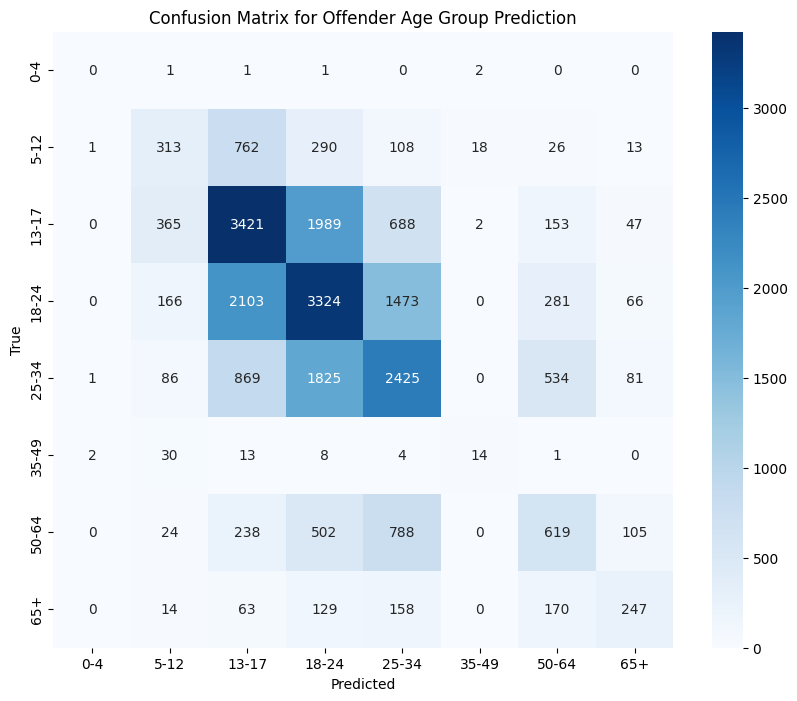

In [ ]:
bins = [0, 4, 12, 17, 24, 34, 49, 64, 120]  # upper bound is 120 to cover all possible ages
labels = ['0-4', '5-12', '13-17', '18-24', '25-34', '35-49', '50-64', '65+']
df_virginia_solved['OffenderAgeGroup'] = pd.cut(df_virginia_solved['OffenderAge'], bins=bins, labels=labels)

# identify needed features and target variables

features = ['VictimAge', 'VictimSex', 'VictimRace', 'WeaponUsed',
            'VictimOffenderRelationship', 'CrimeCircumstance',
            'CrimeSituation', 'HomicideType', 'AdditionalOffenderCount',
            'AdditionalVictimCount']
target = 'OffenderAgeGroup'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['VictimSex', 'VictimRace', 'WeaponUsed',
                        'VictimOffenderRelationship',
                         'HomicideType','CrimeCircumstance','CrimeSituation']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge', 'AdditionalOffenderCount', 'AdditionalVictimCount']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)


# Align X_final and y before dropping NaNs to ensure they have the same index
X_final = X_final[y.notna()] # Keep only rows in X_final where y is not NaN
y = y[y.notna()]  # Keep only rows in y where y is not NaN

# Now you can safely drop NaNs from X_final without causing a mismatch
X_final = X_final.dropna()

# reset index to ensure both X and y have sequential index
X_final = X_final.reset_index(drop=True)
y = y.reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# train via randomforest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# evaluate outcome
y_pred = model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print(f'\nAccuracy score of the random forest classifier is {accuracy:.2f}%')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Offender Age Group Prediction')
plt.show()

### Finding out about the feature importance scores to determine which features are nice

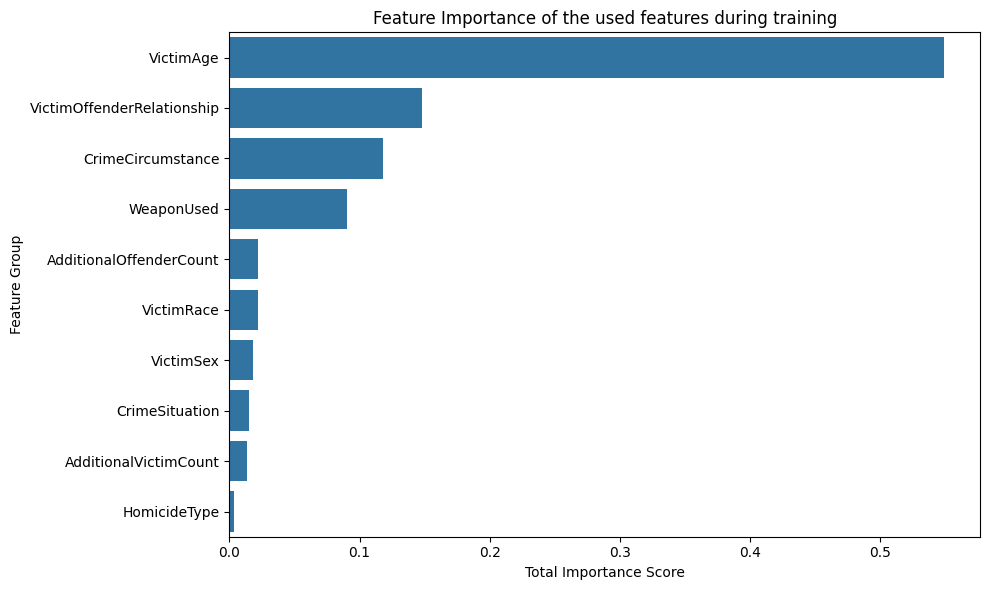

In [ ]:
feature_importances = model.feature_importances_
feature_names = X_final.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Grouping dummy variables back to their original feature
feature_importance_df['BaseFeature'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])

grouped_importance = feature_importance_df.groupby('BaseFeature')['Importance'].sum().reset_index()
grouped_importance = grouped_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='BaseFeature', data=grouped_importance)
plt.xlabel('Total Importance Score')
plt.ylabel('Feature Group')
plt.title('Feature Importance of the used features during training')
plt.tight_layout()
plt.show()


### Dropping certain features with low feature importance: Remaining features with high importance are as follows:
- Victim Age
- WeaponUsed
- CrimeCircumstance
- VictimOffenderRelationship

#### Testing whether accuracy increased after low importance features have been dropped


Accuracy score of the random forest classifier is 42.68%


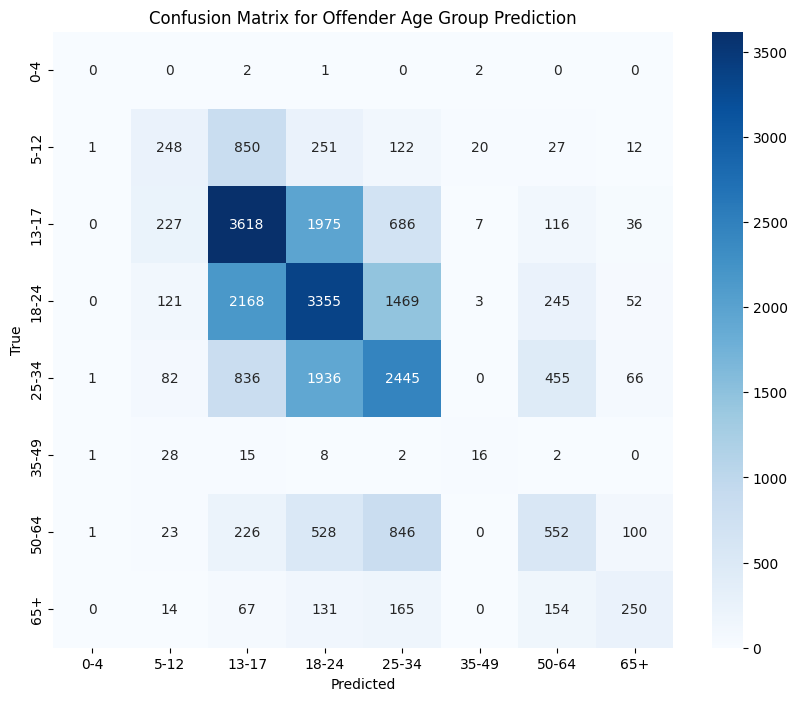

In [ ]:
bins = [0, 4, 12, 17, 24, 34, 49, 64, 120]  # upper bound is 120 to cover all possible ages
labels = ['0-4', '5-12', '13-17', '18-24', '25-34', '35-49', '50-64', '65+']
df_virginia_solved.loc[:, 'OffenderAgeGroup'] = pd.cut(df_virginia_solved['OffenderAge'], bins=bins, labels=labels)

# identify needed features and target variables

features = ['VictimAge', 'WeaponUsed',
            'VictimOffenderRelationship', 'CrimeCircumstance']
target = 'OffenderAgeGroup'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['WeaponUsed',
                        'VictimOffenderRelationship',
                        'CrimeCircumstance']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

# Align X_final and y before dropping NaNs to ensure they have the same index
X_final = X_final[y.notna()] # Keep only rows in X_final where y is not NaN
y = y[y.notna()]  # Keep only rows in y where y is not NaN

# Now you can safely drop NaNs from X_final without causing a mismatch
X_final = X_final.dropna()

# reset index to ensure both X and y have sequential index
X_final = X_final.reset_index(drop=True)
y = y.reset_index(drop=True)


X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# train via randomforest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# evaluate outcome
y_pred = model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print(f'\nAccuracy score of the random forest classifier is {accuracy:.2f}%')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Offender Age Group Prediction')
plt.show()



#### Fine tuning features with the best parameter combination previously found through grid-search

In [ ]:
final_model_chosen = RandomForestClassifier(
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)
final_model_chosen.fit(X_train, y_train)
y_pred = final_model_chosen.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy score of the RandomForestClassifier: {accuracy:.2f}%')

Accuracy score of the RandomForestClassifier: 45.58%


Turns out that predicting age is quite challenging, even by classifying age groups

### Attempt to predict and impute age groups to the unsolved dataset

In [ ]:
X_unsolved_dummies = df_virginia_unsolved[categorical_features]
X_unsolved_encoded = pd.get_dummies(X_unsolved_dummies, drop_first=True)
X_unsolved_numeric = df_virginia_unsolved[['VictimAge']]

X_unsolved_final = pd.concat([X_unsolved_numeric, X_unsolved_encoded], axis=1)

# align features of the encoded dataset with the training set above so that prediction can be accurately carried out
def align_features(X_train, X_new):
    missing_cols = set(X_train.columns) - set(X_new.columns)
    for col in missing_cols:
        X_new[col] = 0
    extra_cols = set(X_new.columns) - set(X_train.columns)
    X_new = X_new.drop(columns=extra_cols)
    X_new = X_new[X_train.columns]
    return X_new
X_unsolved_final = align_features(X_final, X_unsolved_final)

# predict and fill in the predicted values
unsolved_predictions = model.predict(X_unsolved_final)
df_virginia_unsolved['Predicted_AgeGroup'] = unsolved_predictions
unsolved_probabilities = model.predict_proba(X_unsolved_final)
df_virginia_unsolved['Prob_0-4'] = np.round(unsolved_probabilities[:, 0], 2)*100
df_virginia_unsolved['Prob_13-17'] = np.round(unsolved_probabilities[:, 1], 2)*100
df_virginia_unsolved['Prob_18-24'] = np.round(unsolved_probabilities[:, 2], 2)*100
df_virginia_unsolved['Prob_25-34'] = np.round(unsolved_probabilities[:, 3], 2)*100
df_virginia_unsolved['Prob_35-49'] = np.round(unsolved_probabilities[:, 4], 2)*100
df_virginia_unsolved['Prob_5-12'] = np.round(unsolved_probabilities[:, 5], 2)*100
df_virginia_unsolved['Prob_50-64'] = np.round(unsolved_probabilities[:, 6], 2)*100
df_virginia_unsolved['Prob_65+'] = np.round(unsolved_probabilities[:, 7], 2)*100
print(model.classes_)
df_virginia_unsolved.iloc[:, 24:].head()


['0-4' '13-17' '18-24' '25-34' '35-49' '5-12' '50-64' '65+']


,Predicted_OffenderSex,Prob_Male,Prob_Female,Predicted_OffenderRace,Prob_Black,Prob_White,Prob_Asian,Prob_American Indian or Alaskan Native,Predicted_AgeGroup,Prob_0-4,Prob_13-17,Prob_18-24,Prob_25-34,Prob_35-49,Prob_5-12,Prob_50-64,Prob_65+
4482,Male,100.0,0.0,Black,100.0,0.0,0.0,0.0,18-24,0.0,14.0,52.0,26.0,5.0,0.0,1.0,1.0
4625,Male,98.0,2.0,Black,89.0,0.0,0.0,0.0,18-24,0.0,13.0,43.0,29.0,13.0,0.0,2.0,0.0
4627,Male,98.0,2.0,Black,94.0,0.0,0.0,0.0,18-24,0.0,0.0,83.0,14.0,3.0,0.0,0.0,0.0
4664,Male,100.0,0.0,Black,100.0,0.0,0.0,0.0,18-24,0.0,6.0,39.0,34.0,18.0,0.0,1.0,1.0
4682,Male,94.0,6.0,Black,98.0,0.0,0.0,0.0,18-24,0.0,20.0,43.0,19.0,9.0,0.0,0.0,9.0


### Training another random forest classifier model to predict <b>victim offender relationship</b>

Accuracy score of the random forest classifier is 44.59%


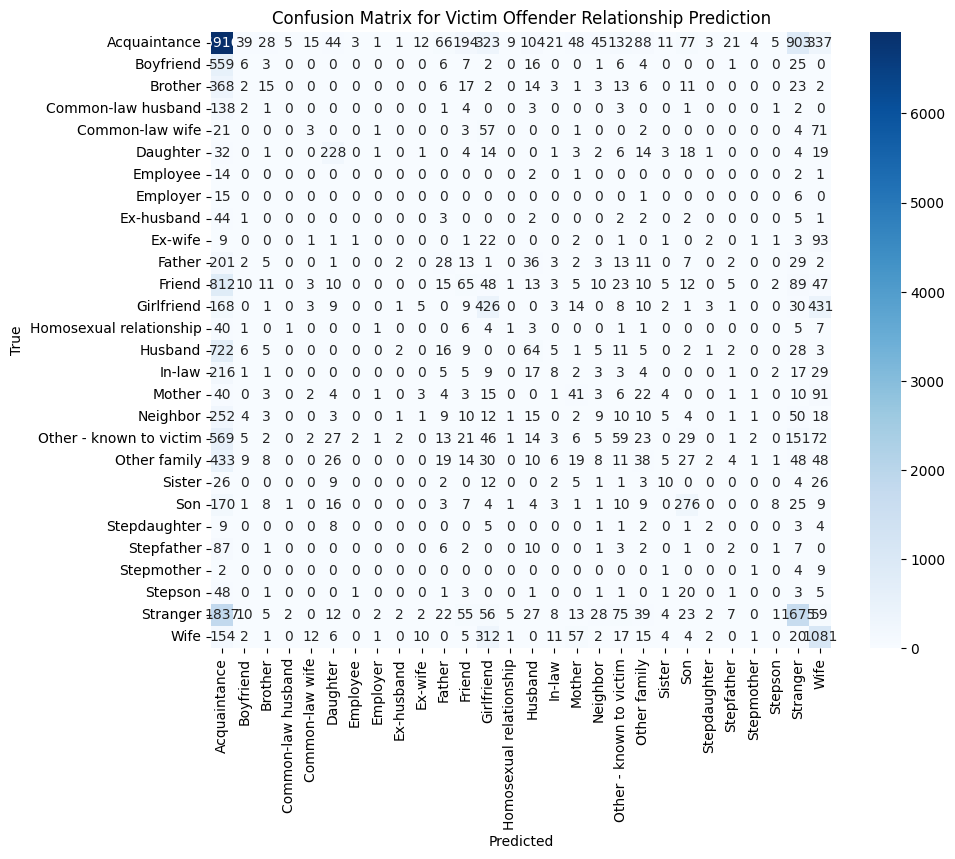

In [ ]:

features = ['VictimAge', 'VictimSex', 'VictimRace', 'WeaponUsed',
            'CrimeCircumstance', 'CrimeSituation', 'HomicideType']
target = 'VictimOffenderRelationship'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['VictimSex', 'VictimRace', 'WeaponUsed',
                         'HomicideType','CrimeCircumstance','CrimeSituation']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# train via randomforest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# evaluate outcome
y_pred = model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
relationship_labels = sorted(y_test.unique())
print(f'Accuracy score of the random forest classifier is {accuracy:.2f}%')
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=relationship_labels, yticklabels=relationship_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Victim Offender Relationship Prediction')
plt.show()



### Attempt to predict and impute data for the unsolved cases

In [ ]:
X_unsolved_dummies = df_virginia_unsolved[categorical_features]
X_unsolved_encoded = pd.get_dummies(X_unsolved_dummies, drop_first=True)
X_unsolved_numeric = df_virginia_unsolved[['VictimAge']]

X_unsolved_final = pd.concat([X_unsolved_numeric, X_unsolved_encoded], axis=1)

# align features of the encoded dataset with the training set above so that prediction can be accurately carried out
def align_features(X_train, X_new):
    missing_cols = set(X_train.columns) - set(X_new.columns)
    for col in missing_cols:
        X_new[col] = 0
    extra_cols = set(X_new.columns) - set(X_train.columns)
    X_new = X_new.drop(columns=extra_cols)
    X_new = X_new[X_train.columns]
    return X_new
X_unsolved_final = align_features(X_final, X_unsolved_final)

# predict and fill in the predicted values
unsolved_predictions = model.predict(X_unsolved_final)
df_virginia_unsolved['Predicted_VictimOffenderRelationship'] = unsolved_predictions
unsolved_probabilities = model.predict_proba(X_unsolved_final)
for idx, relationship_class in enumerate(model.classes_):
    df_virginia_unsolved[f'Prob_{relationship_class}'] = np.round(unsolved_probabilities[:, idx], 2)*100
print(model.classes_)
df_virginia_unsolved.iloc[:, 24:].head()


['Acquaintance' 'Boyfriend' 'Brother' 'Common-law husband'
 'Common-law wife' 'Daughter' 'Employee' 'Employer' 'Ex-husband' 'Ex-wife'
 'Father' 'Friend' 'Girlfriend' 'Homosexual relationship' 'Husband'
 'In-law' 'Mother' 'Neighbor' 'Other - known to victim' 'Other family'
 'Sister' 'Son' 'Stepdaughter' 'Stepfather' 'Stepmother' 'Stepson'
 'Stranger' 'Wife']


,Predicted_OffenderSex,Prob_Male,Prob_Female,Predicted_OffenderRace,Prob_Black,Prob_White,Prob_Asian,Prob_American Indian or Alaskan Native,Predicted_AgeGroup,Prob_0-4,...,Prob_Other - known to victim,Prob_Other family,Prob_Sister,Prob_Son,Prob_Stepdaughter,Prob_Stepfather,Prob_Stepmother,Prob_Stepson,Prob_Stranger,Prob_Wife
4482,Male,100.0,0.0,Black,100.0,0.0,0.0,0.0,18-24,0.0,...,8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0
4625,Male,98.0,2.0,Black,89.0,0.0,0.0,0.0,18-24,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0
4627,Male,98.0,2.0,Black,94.0,0.0,0.0,0.0,18-24,0.0,...,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0
4664,Male,100.0,0.0,Black,100.0,0.0,0.0,0.0,18-24,0.0,...,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0
4682,Male,94.0,6.0,Black,98.0,0.0,0.0,0.0,18-24,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,88.0


In [ ]:
df_virginia_unsolved.iloc[:, 40:].head()

,Prob_65+,Predicted_VictimOffenderRelationship,Prob_Acquaintance,Prob_Boyfriend,Prob_Brother,Prob_Common-law husband,Prob_Common-law wife,Prob_Daughter,Prob_Employee,Prob_Employer,...,Prob_Other - known to victim,Prob_Other family,Prob_Sister,Prob_Son,Prob_Stepdaughter,Prob_Stepfather,Prob_Stepmother,Prob_Stepson,Prob_Stranger,Prob_Wife
4482,1.0,Acquaintance,57.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0
4625,0.0,Acquaintance,54.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0
4627,0.0,Stranger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0
4664,1.0,Acquaintance,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0
4682,9.0,Wife,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,88.0


In [ ]:
df_virginia_unsolved['Predicted_VictimOffenderRelationship'].value_counts()

,count
Predicted_VictimOffenderRelationship,
Acquaintance,769
Stranger,234
Other - known to victim,49
Wife,38
Other family,24
Friend,23
Girlfriend,23
Son,18
Father,11


In [ ]:
df_virginia_unsolved['CountyFIPS'].unique()

array(['Jefferson, AL', 'Mobile, AL', 'Montgomery, AL', 'Houston, AL',
       'Madison, AL', 'Russell, AL', 'Tallapoosa, AL', 'Tuscaloosa, AL',
       'Columbia, AR', 'Craighead, AR', 'Crittenden, AR', 'Faulkner, AR',
       'Franklin, AR', 'Garland, AR', 'Hempstead, AR', 'Miller, AR',
       'Mississippi, AR', 'Monroe, AR', 'Ouachita, AR', 'Pulaski, AR',
       'Sebastian, AR', 'Alachua, FL', 'Baker, FL', 'Bay, FL',
       'Brevard, FL', 'Broward, FL', 'Citrus, FL', 'Clay, FL',
       'Collier, FL', 'Columbia, FL', 'Miami-Dade, FL', 'Duval, FL',
       'Escambia, FL', 'Flagler, FL', 'Gadsden, FL', 'Hamilton, FL',
       'Hardee, FL', 'Hendry, FL', 'Hernando, FL', 'Highlands, FL',
       'Hillsborough, FL', 'Jackson, FL', 'Lake, FL', 'Lee, FL',
       'Leon, FL', 'Madison, FL', 'Manatee, FL', 'Marion, FL',
       'Martin, FL', 'Monroe, FL', 'Okaloosa, FL', 'Orange, FL',
       'Osceola, FL', 'Palm Beach, FL', 'Pasco, FL', 'Pinellas, FL',
       'Polk, FL', 'Putnam, FL', 'St. Johns, FL'

### Using geopy to geolocate the county names of the unsolved cases and visualize the suspect demographics

In [ ]:
import time
import folium

county_coords = {
    'Jefferson, AL': (33.5543, -86.8965),
    'Mobile, AL': (30.6954, -88.0399),
    'Montgomery, AL': (32.3617, -86.2792),
    'Houston, AL': (31.1460, -85.3927),
    'Madison, AL': (34.7280, -86.5861),
    'Russell, AL': (32.2880, -85.1894),
    'Tallapoosa, AL': (32.8067, -85.7989),
    'Tuscaloosa, AL': (33.2098, -87.5692),
    'Columbia, AR': (33.2130, -93.2260),
    'Craighead, AR': (35.8301, -90.6320),
    'Crittenden, AR': (35.2066, -90.3089),
    'Faulkner, AR': (35.0740, -92.4123),
    'Franklin, AR': (35.4875, -93.8927),
    'Garland, AR': (34.5559, -93.1770),
    'Hempstead, AR': (33.7464, -93.6620),
    'Miller, AR': (33.3337, -93.6750),
    'Mississippi, AR': (35.7570, -90.1316),
    'Monroe, AR': (34.6550, -91.1870),
    'Ouachita, AR': (33.5880, -92.8786),
    'Pulaski, AR': (34.7465, -92.2896),
    'Sebastian, AR': (35.1910, -94.2383),
    'Alachua, FL': (29.6516, -82.3248),
    'Baker, FL': (30.3931, -82.3018),
    'Bay, FL': (30.1805, -85.6846),
    'Brevard, FL': (28.2639, -80.7214),
    'Broward, FL': (26.1901, -80.3659),
    'Citrus, FL': (28.8849, -82.5186),
    'Clay, FL': (29.9944, -81.7787),
    'Collier, FL': (26.0690, -81.4279),
    'Columbia, FL': (30.1813, -82.6051),
    'Miami-Dade, FL': (25.7617, -80.1918),
    'Duval, FL': (30.3322, -81.6557),
    'Escambia, FL': (30.3960, -87.2916),
    'Flagler, FL': (29.4086, -81.2519),
    'Gadsden, FL': (30.5563, -84.6479),
    'Hamilton, FL': (30.4860, -82.9502),
    'Hardee, FL': (27.5048, -81.8200),
    'Hendry, FL': (26.6100, -81.0755),
    'Hernando, FL': (28.5578, -82.3886),
    'Highlands, FL': (27.3400, -81.3400),
    'Hillsborough, FL': (27.9944, -82.4451),
    'Jackson, FL': (30.7159, -85.1894),
    'Lake, FL': (28.7028, -81.7787),
    'Lee, FL': (26.6630, -81.9535),
    'Leon, FL': (30.4383, -84.2807),
    'Madison, FL': (30.4694, -83.4123),
    'Manatee, FL': (27.4799, -82.3452),
    'Marion, FL': (29.2108, -82.0738),
    'Martin, FL': (27.0805, -80.4100),
    'Monroe, FL': (24.5557, -81.7826),
    'Okaloosa, FL': (30.5773, -86.6611),
    'Orange, FL': (28.4845, -81.2519),
    'Osceola, FL': (28.1010, -81.0755),
    'Palm Beach, FL': (26.7056, -80.0364),
    'Pasco, FL': (28.3232, -82.4319),
    'Pinellas, FL': (27.8764, -82.7779),
    'Polk, FL': (27.8616, -81.6912),
    'Putnam, FL': (29.6580, -81.7787),
    'St. Johns, FL': (29.9711, -81.4279),
    'St. Lucie, FL': (27.2730, -80.3503),
    'Sarasota, FL': (27.3364, -82.5307),
    'Seminole, FL': (28.7030, -81.2079),
    'Sumter, FL': (28.7030, -82.0955),
    'Taylor, FL': (30.0124, -83.5818),
    'Volusia, FL': (29.0270, -81.0755),
    'Bibb, GA': (32.8407, -83.6324),
    'Burke, GA': (33.0882, -81.9535),
    'Carroll, GA': (33.5801, -85.0766),
    'Clayton, GA': (33.5572, -84.3750),
    'Cobb, GA': (33.8999, -84.5641),
    'Colquitt, GA': (31.2078, -83.7890),
    'De Kalb, GA': (33.7956, -84.2279),
    'Effingham, GA': (32.3640, -81.3610),
    'Evans, GA': (32.1610, -81.9054),
    'Fulton, GA': (33.8034, -84.3963),
    'Gwinnett, GA': (33.9191, -84.0160),
    'Heard, GA': (33.2962, -85.1471),
    'Henry, GA': (33.4357, -84.1469),
    'Lowndes, GA': (30.8333, -83.2785),
    'Rockdale, GA': (33.6752, -84.0379),
    'Campbell, KY': (39.0837, -84.3963),
    'Daviess, KY': (37.7450, -87.1133),
    'Jefferson, KY': (38.2542, -85.7594),
    'Pulaski, KY': (37.1060, -84.5880),
    'Scott, KY': (38.2098, -84.5588),
    'Natchitoches, LA': (31.7600, -93.0863),
    'Rapides, LA': (31.1390, -92.3980),
    'St. Martin, LA': (30.1200, -91.8320),
    'St. Tammany, LA': (30.4357, -89.9253),
    'Orleans, LA': (29.9511, -90.0715),
    'Anne Arundel, MD': (38.9530, -76.5488),
    'Harford, MD': (39.5830, -76.3637),
    "Prince George's, MD": (38.7849, -76.8721),
    'Washington, MD': (39.6418, -77.7199),
    'Baltimore city, MD': (39.2904, -76.6122),
    'Alamance, NC': (36.0480, -79.4069),
    'Durham, NC': (35.9940, -78.8986),
    'Forsyth, NC': (36.0999, -80.2442),
    'Gaston, NC': (35.2633, -81.1873),
    'Granville, NC': (36.3092, -78.6115),
    'Harnett, NC': (35.3500, -78.8500),
    'Johnston, NC': (35.5074, -78.3467),
    'Mecklenburg, NC': (35.2271, -80.8431),
    'Pitt, NC': (35.6266, -77.3664),
    'Surry, NC': (36.3930, -80.6848),
    'Beaufort, SC': (32.4316, -80.6698),
    'Charleston, SC': (32.7765, -79.9311),
    'Clarendon, SC': (33.6784, -80.1875),
    'Colleton, SC': (32.9020, -80.6660),
    'Darlington, SC': (34.2990, -79.8762),
    'Dillon, SC': (34.4150, -79.3712),
    'Dorchester, SC': (33.0132, -80.1756),
    'Greenville, SC': (34.8526, -82.3940),
    'Horry, SC': (33.9197, -78.9288),
    'Jasper, SC': (32.4910, -81.0070),
    'Richland, SC': (34.0007, -81.0348)
}



df_virginia_unsolved['Coordinates'] = df_virginia_unsolved['CountyFIPS'].map(county_coords)
df_virginia_unsolved['Latitude'] = df_virginia_unsolved['Coordinates'].apply(lambda x: x[0] if pd.notnull(x) else None)
df_virginia_unsolved['Longitude'] = df_virginia_unsolved['Coordinates'].apply(lambda x: x[1] if pd.notnull(x) else None)

race_color = {
    'Black':'black',
    'White':'white',
    'Asian':'orange',
    'American India or Alaskan Native':'red'
}

m = folium.Map(location=[37.5, -78.7], zoom_start=7)
race_color = {
    'Black': 'black',
    'White': 'pink',
    'Asian': 'orange',
    'American Indian or Alaskan Native': 'red',
}


for idx, row in df_virginia_unsolved.iterrows():
    if pd.isnull(row['Latitude']) or pd.isnull(row['Longitude']):
        continue

    color = race_color.get(row['Predicted_OffenderRace'], 'gray')
    icon_type = 'male' if row['Predicted_OffenderSex'] == 'Male' else 'female'
    age = row['Predicted_AgeGroup']

    popup_text = (
        f"<b>Sex:</b> {row['Predicted_OffenderSex']}<br>"
        f"<b>Race:</b> {row['Predicted_OffenderRace']}<br>"
        f"<b>Age Group:</b> {age}<br>"
        f"<b>Victim Offender Relationship:</b> {row['Predicted_VictimOffenderRelationship']}"
    )

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color=color, icon=icon_type, prefix='fa')
    ).add_to(m)

m.save('virginia_predicted_offenders_map.html')

### Final HTML map that showcases the distribution of the unsolved cases across Virginia, as well as popups containing relevant demographic information regarding each potential suspect

- Pink: White
- Black: African American
- Orange: Asian
- Red: American Indian

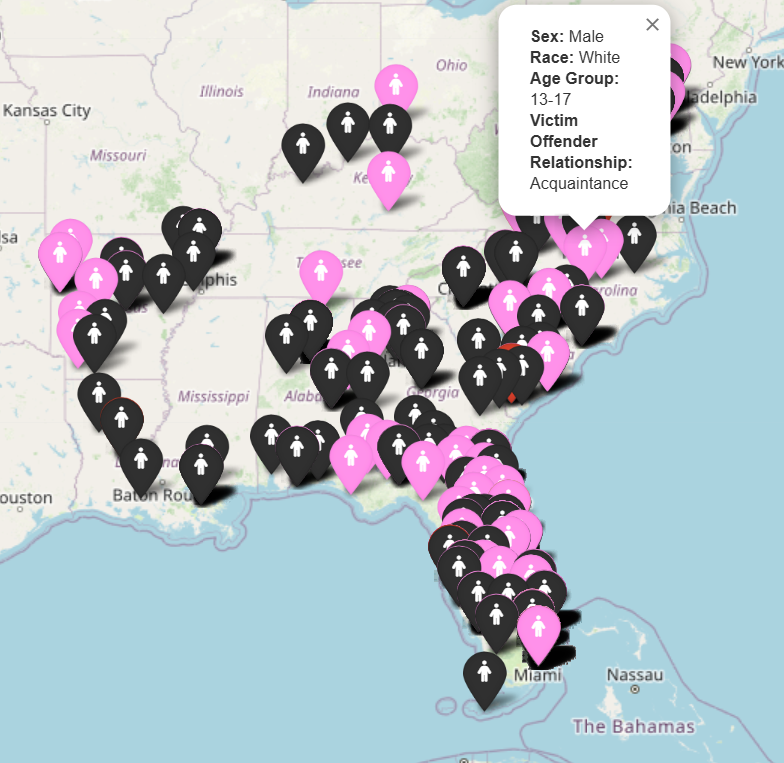

In [ ]:
from IPython.display import Image, display

display(Image('Demographic_Map.png'))

Potential patterns could be identified in the clusters of predicted suspects along the south eastern states, it is shown that the majority of the suspects predicted are of black and white racial background. 

### Visualizing results of the predicted demographic

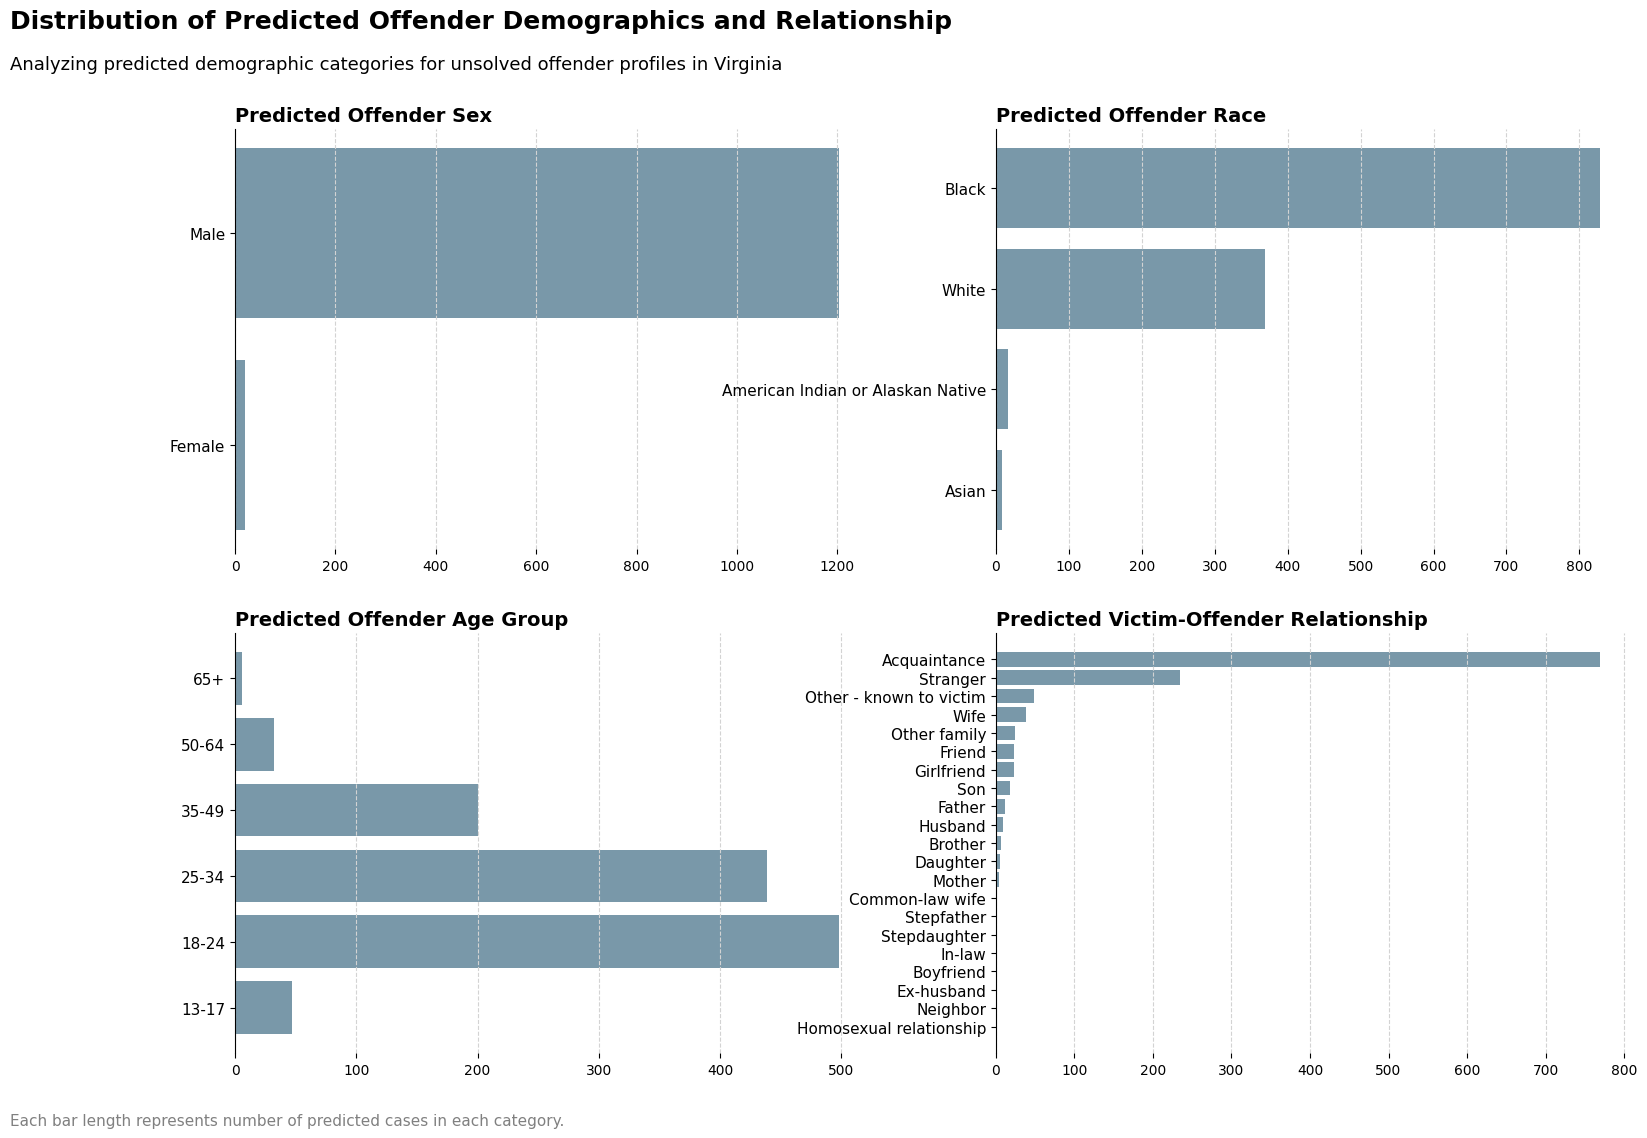

In [ ]:
bar_color = '#7998A9'  # Single color for all charts
bar_width = 0.6

sex_counts = df_virginia_unsolved['Predicted_OffenderSex'].value_counts().sort_values(ascending=True)

race_counts = df_virginia_unsolved['Predicted_OffenderRace'].value_counts().sort_values(ascending=True)

agegroup_order = ['0-4', '5-12', '13-17', '18-24', '25-34', '35-49', '50-64', '65+']
age_counts = df_virginia_unsolved['Predicted_AgeGroup'].value_counts().reindex(agegroup_order).dropna()

relationship_counts = df_virginia_unsolved['Predicted_VictimOffenderRelationship'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(18, 12))
plt.tight_layout()
plt.subplots_adjust(top=0.88)

plt.suptitle("Distribution of Predicted Offender Demographics and Relationship", fontsize=18, fontweight='bold', x=0.0, ha='left')
plt.figtext(0.0, 0.93, "Analyzing predicted demographic categories for unsolved offender profiles in Virginia", fontsize=13, ha='left')
plt.figtext(0.0, 0.05, "Each bar length represents number of predicted cases in each category.", fontsize=11, color='grey', ha='left')

ax1 = plt.subplot(2, 2, 1)
y1 = np.arange(len(sex_counts))
ax1.barh(y1, sex_counts.values, color=bar_color)
ax1.set_yticks(y1)
ax1.set_yticklabels(sex_counts.index, fontsize=11)
ax1.set_title('Predicted Offender Sex', fontsize=14, fontweight='bold', loc='left')
ax1.grid(axis='x', linestyle='--', color='lightgrey')

ax2 = plt.subplot(2, 2, 2)
y2 = np.arange(len(race_counts))
ax2.barh(y2, race_counts.values, color=bar_color)
ax2.set_yticks(y2)
ax2.set_yticklabels(race_counts.index, fontsize=11)
ax2.set_title('Predicted Offender Race', fontsize=14, fontweight='bold', loc='left')
ax2.grid(axis='x', linestyle='--', color='lightgrey')

ax3 = plt.subplot(2, 2, 3)
y3 = np.arange(len(age_counts))
ax3.barh(y3, age_counts.values, color=bar_color)
ax3.set_yticks(y3)
ax3.set_yticklabels(age_counts.index, fontsize=11)
ax3.set_title('Predicted Offender Age Group', fontsize=14, fontweight='bold', loc='left')
ax3.grid(axis='x', linestyle='--', color='lightgrey')

ax4 = plt.subplot(2, 2, 4)
y4 = np.arange(len(relationship_counts))
ax4.barh(y4, relationship_counts.values, color=bar_color)
ax4.set_yticks(y4)
ax4.set_yticklabels(relationship_counts.index, fontsize=11)
ax4.set_title('Predicted Victim-Offender Relationship', fontsize=14, fontweight='bold', loc='left')
ax4.grid(axis='x', linestyle='--', color='lightgrey')

for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.show()


Turns out the predictive model is heavily 'skewed' towards accusing male, black/white, age 18-24, and people who are aquaintances as murderous suspects. 

<b>While some may argue that this outcome is quite intuitive, we must still take into account of the fact that this model is solely trained upon variables of victim demographics, weapons used, and circumstances regarding homicide.</b> The model does not take into account of the offender's own demographics, nor does it have access to the data regarding the suspects socio-economic background, or covariate variables that describes the interaction between the victim and the suspect. Given that human behavior is extremely random, and that the occurance of homicides usually happens because of particular behavioral interaction that triggered a 'murderous' event between the victim and the murderer. Hence, should that data be available, it would likely greatly improve the accuracy of the model and render the results more accurately referencable, rather than reflecting a result that pertains more to our stereotypical biases and misnformed judgements. 

In [ ]:
df_virginia_unsolved.to_csv('Suspect_Demographic_Prediction.csv')

---

## Murder Mystery - Who are the <b>suspects on the run</b> in unsolved cases in South Eastern States?

### <b>Predicting demographic features of unsolved cases based off solved cases

#### Virginia - predicting Offender Age, Race, Gender, and VictimOffenderRelationship

In [ ]:
df[df['State'] == 'Virginia']

,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,VictimEthnicity,OffenderAge,OffenderSex,OffenderRace,WeaponUsed,VictimOffenderRelationship,CrimeCircumstance,AdditionalVictimCount,AdditionalOffenderCount,MetropolitanArea
845310,"Accomack, VA",Virginia,Accomack County,Sheriff,Yes,1976,September,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,62,Male,Black,"Handgun - pistol, revolver, etc",Stranger,Gambling,0,0,Rural Virginia
845311,"Accomack, VA",Virginia,Accomack County,Sheriff,Yes,1976,November,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,22,Male,Asian,"Blunt object - hammer, club, etc",Acquaintance,Other arguments,0,0,Rural Virginia
845312,"Accomack, VA",Virginia,Accomack County,Sheriff,Yes,1976,November,2,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,47,Male,Asian,"Firearm, type not stated",Acquaintance,Other arguments,0,0,Rural Virginia
845313,"Accomack, VA",Virginia,Accomack County,Sheriff,Yes,1976,December,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,46,Male,Black,Drowning,Acquaintance,Other arguments,0,0,Rural Virginia
845314,"Accomack, VA",Virginia,Accomack County,Sheriff,Yes,1976,December,2,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,21,Male,Black,Shotgun,Acquaintance,Other arguments,0,0,Rural Virginia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867759,"Alexandria, VA",Virginia,Pentagon Force Protection Agency,Primary federal LE,Yes,2021,August,1,Normal update,Murder and non-negligent manslaughter,...,Hispanic origin,27,Male,Unknown,"Firearm, type not stated",Relationship not determined,Other,0,0,"Washington-Arlington-Alexandria, DC-VA-MD-WV"
867760,"Arlington, VA",Virginia,Reagan National Airport,Special police,Yes,1997,March,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,26,Female,Black,Other or type unknown,Other - known to victim,Other,0,0,"Washington-Arlington-Alexandria, DC-VA-MD-WV"
867761,"Arlington, VA",Virginia,Reagan National Airport,Special police,Yes,2000,March,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,46,Male,White,"Blunt object - hammer, club, etc",Acquaintance,Other arguments,0,0,"Washington-Arlington-Alexandria, DC-VA-MD-WV"
867762,"Arlington, VA",Virginia,Reagan National Airport,Special police,Yes,2002,November,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,22,Male,Black,Other or type unknown,Acquaintance,Other arguments,0,0,"Washington-Arlington-Alexandria, DC-VA-MD-WV"


In [ ]:
df_virginia_solved = df[(df['State'] == 'Virginia') & (df['SolvedStatus'] == 'Yes')]
df_virginia_solved

,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,VictimEthnicity,OffenderAge,OffenderSex,OffenderRace,WeaponUsed,VictimOffenderRelationship,CrimeCircumstance,AdditionalVictimCount,AdditionalOffenderCount,MetropolitanArea
845310,"Accomack, VA",Virginia,Accomack County,Sheriff,Yes,1976,September,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,62,Male,Black,"Handgun - pistol, revolver, etc",Stranger,Gambling,0,0,Rural Virginia
845311,"Accomack, VA",Virginia,Accomack County,Sheriff,Yes,1976,November,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,22,Male,Asian,"Blunt object - hammer, club, etc",Acquaintance,Other arguments,0,0,Rural Virginia
845312,"Accomack, VA",Virginia,Accomack County,Sheriff,Yes,1976,November,2,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,47,Male,Asian,"Firearm, type not stated",Acquaintance,Other arguments,0,0,Rural Virginia
845313,"Accomack, VA",Virginia,Accomack County,Sheriff,Yes,1976,December,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,46,Male,Black,Drowning,Acquaintance,Other arguments,0,0,Rural Virginia
845314,"Accomack, VA",Virginia,Accomack County,Sheriff,Yes,1976,December,2,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,21,Male,Black,Shotgun,Acquaintance,Other arguments,0,0,Rural Virginia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867759,"Alexandria, VA",Virginia,Pentagon Force Protection Agency,Primary federal LE,Yes,2021,August,1,Normal update,Murder and non-negligent manslaughter,...,Hispanic origin,27,Male,Unknown,"Firearm, type not stated",Relationship not determined,Other,0,0,"Washington-Arlington-Alexandria, DC-VA-MD-WV"
867760,"Arlington, VA",Virginia,Reagan National Airport,Special police,Yes,1997,March,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,26,Female,Black,Other or type unknown,Other - known to victim,Other,0,0,"Washington-Arlington-Alexandria, DC-VA-MD-WV"
867761,"Arlington, VA",Virginia,Reagan National Airport,Special police,Yes,2000,March,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,46,Male,White,"Blunt object - hammer, club, etc",Acquaintance,Other arguments,0,0,"Washington-Arlington-Alexandria, DC-VA-MD-WV"
867762,"Arlington, VA",Virginia,Reagan National Airport,Special police,Yes,2002,November,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,22,Male,Black,Other or type unknown,Acquaintance,Other arguments,0,0,"Washington-Arlington-Alexandria, DC-VA-MD-WV"


# Identify and drop the missing values

In [ ]:
df_virginia_solved['VictimSex'] = df_virginia_solved['VictimSex'].replace('Unknown', np.nan)
print(df_virginia_solved['VictimSex'].value_counts(), '\n')

df_virginia_solved['VictimRace'] = df_virginia_solved['VictimRace'].replace('Unknown', np.nan)
print(df_virginia_solved['VictimRace'].value_counts(), '\n')

df_virginia_solved['VictimOffenderRelationship'] = df_virginia_solved['VictimOffenderRelationship'].replace('Relationship not determined', np.nan)
print(df_virginia_solved['VictimOffenderRelationship'].value_counts(), '\n')

df_virginia_solved['WeaponUsed'] = df_virginia_solved['WeaponUsed'].replace('Other or type unknown', np.nan)
print(df_virginia_solved['WeaponUsed'].value_counts(), '\n')

df_virginia_solved['CrimeSituation'] = df_virginia_solved['CrimeSituation'].replace('Unknown', np.nan)
print(df_virginia_solved['CrimeSituation'].value_counts(), '\n')

df_virginia_solved['CrimeCircumstance'] = df_virginia_solved['CrimeCircumstance'].replace('Circumstances undetermined', np.nan)
print(df_virginia_solved['CrimeCircumstance'].value_counts(), '\n')

print(df_virginia_solved['OffenderSex'].value_counts(), '\n')

df_virginia_solved['OffenderRace'] = df_virginia_solved['OffenderRace'].replace('Unknown', np.nan)
print(df_virginia_solved['OffenderRace'].value_counts(), '\n')

print(df_virginia_solved['OffenderAge'].value_counts(), '\n')

print(df_virginia_solved['HomicideType'].value_counts())
df_virginia_solved.dropna(inplace=True)
df_virginia_solved.isnull().sum()

VictimSex
Male      12463
Female     4708
Name: count, dtype: int64 

VictimRace
Black                                  9414
White                                  7471
Asian                                   169
American Indian or Alaskan Native        19
Native Hawaiian or Pacific Islander       1
Name: count, dtype: int64 

VictimOffenderRelationship
Acquaintance               5460
Stranger                   2254
Wife                       1096
Girlfriend                  772
Other - known to victim     744
Friend                      577
Husband                     453
Other family                380
Son                         368
Boyfriend                   343
Daughter                    274
Brother                     243
Father                      242
Neighbor                    235
Mother                      189
In-law                      183
Sister                       81
Ex-wife                      64
Stepfather                   58
Stepson                      43
Homo

<ipython-input-49-df23f69a10a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_virginia_solved['VictimSex'] = df_virginia_solved['VictimSex'].replace('Unknown', np.nan)
<ipython-input-49-df23f69a10a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_virginia_solved['VictimRace'] = df_virginia_solved['VictimRace'].replace('Unknown', np.nan)
<ipython-input-49-df23f69a10a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,0
CountyFIPS,0
State,0
AgencyName,0
AgencyType,0
SolvedStatus,0
YearReported,0
MonthReported,0
IncidentID,0
ReportActionType,0
HomicideType,0


# Train a Random Forest Classifier model to predict offender <b>sex</b> from the solved cases dataset in the state of virginia

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# identify needed features and target variables
features = ['VictimAge', 'VictimSex', 'VictimRace', 'WeaponUsed',
            'VictimOffenderRelationship', 'CrimeCircumstance',
            'CrimeSituation', 'HomicideType']
target = 'OffenderSex'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['VictimSex', 'VictimRace', 'WeaponUsed',
                        'VictimOffenderRelationship',
                         'HomicideType','CrimeCircumstance','CrimeSituation']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# train via randomforest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# evaluate outcome
y_pred = model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print(f'classification report: {classification_report(y_test, y_pred)}\n')
print(f'confusion matrix: {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy score of the random forest classifier is {accuracy:.2f}%')



classification report:               precision    recall  f1-score   support

      Female       0.70      0.59      0.64       302
        Male       0.94      0.96      0.95      1979

    accuracy                           0.91      2281
   macro avg       0.82      0.77      0.79      2281
weighted avg       0.91      0.91      0.91      2281


confusion matrix: [[ 177  125]
 [  76 1903]]

Accuracy score of the random forest classifier is 91.19%


# Predict and impute offender sex from the unsolved Virginia Dataset

In [ ]:
# find the unsolved cases dataset for predictive imputation
df_virginia_unsolved = df[(df['State'] == 'Virginia') & (df['SolvedStatus'] == 'No')].copy()

# df_virginia_unsolved['VictimSex'] = df_virginia_unsolved['VictimSex'].replace('Unknown', np.nan)
# df_virginia_unsolved['VictimRace'] = df_virginia_unsolved['VictimRace'].replace('Unknown', np.nan)
# df_virginia_unsolved['VictimOffenderRelationship'] = df_virginia_unsolved['VictimOffenderRelationship'].replace('Relationship not determined', np.nan)
# df_virginia_unsolved['WeaponUsed'] = df_virginia_unsolved['WeaponUsed'].replace('Other or type unknown', np.nan)
# df_virginia_unsolved['CrimeSituation'] = df_virginia_unsolved['CrimeSituation'].replace('Unknown', np.nan)
# df_virginia_unsolved['CrimeCircumstance'] = df_virginia_unsolved['CrimeCircumstance'].replace('Circumstances undetermined', np.nan)
# df_virginia_unsolved['OffenderRace'] = df_virginia_unsolved['OffenderRace'].replace('Unknown', np.nan)

# one-hot encode categorical variables and combine them together with the continuous variable 'age'
X_unsolved_dummies = df_virginia_unsolved[categorical_features]
X_unsolved_encoded = pd.get_dummies(X_unsolved_dummies, drop_first=True)
X_unsolved_numeric = df_virginia_unsolved[['VictimAge']]

X_unsolved_final = pd.concat([X_unsolved_numeric, X_unsolved_encoded], axis=1)

# align features of the encoded dataset with the training set above so that prediction can be accurately carried out
def align_features(X_train, X_new):
    missing_cols = set(X_train.columns) - set(X_new.columns)
    for col in missing_cols:
        X_new[col] = 0
    extra_cols = set(X_new.columns) - set(X_train.columns)
    X_new = X_new.drop(columns=extra_cols)
    X_new = X_new[X_train.columns]
    return X_new
X_unsolved_final = align_features(X_final, X_unsolved_final)

# predict and fill in the predicted values
unsolved_predictions = model.predict(X_unsolved_final)
df_virginia_unsolved['Predicted_OffenderSex'] = unsolved_predictions
unsolved_probabilities = model.predict_proba(X_unsolved_final)
df_virginia_unsolved['Prob_Male'] = np.round(unsolved_probabilities[:, 1], 2)*100
df_virginia_unsolved['Prob_Female'] = np.round(unsolved_probabilities[:, 0], 2)*100
print(model.classes_)
df_virginia_unsolved.head(7)


['Female' 'Male']


,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,OffenderRace,WeaponUsed,VictimOffenderRelationship,CrimeCircumstance,AdditionalVictimCount,AdditionalOffenderCount,MetropolitanArea,Predicted_OffenderSex,Prob_Male,Prob_Female
845735,"Amherst, VA",Virginia,Amherst County,Sheriff,No,2017,December,1,Normal update,Manslaughter by negligence,...,Unknown,"Narcotics or drugs, sleeping pills",Relationship not determined,All other manslaughter by negligence,0,0,"Lynchburg, VA",Female,45.0,55.0
848941,"Gloucester, VA",Virginia,Gloucester County,Sheriff,No,2022,October,1,Normal update,Murder and non-negligent manslaughter,...,Unknown,Knife or cutting instrument,Relationship not determined,Circumstances undetermined,0,0,"Virginia Beach-Norfolk-Newport News, VA-NC",Male,97.0,3.0
849388,"Hanover, VA",Virginia,Hanover County,Sheriff,No,2004,August,1,Normal update,Murder and non-negligent manslaughter,...,Unknown,Other or type unknown,Relationship not determined,Circumstances undetermined,0,0,"Richmond, VA",Male,97.0,3.0
849908,"Henrico, VA",Virginia,Henrico County Police D,County police,No,2011,April,1,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Other - known to victim,Circumstances undetermined,0,0,"Richmond, VA",Male,96.0,4.0
850937,"Loudoun, VA",Virginia,Leesburg,Municipal police,No,2009,March,1,Normal update,Murder and non-negligent manslaughter,...,Unknown,Knife or cutting instrument,Relationship not determined,Other,0,0,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Male,99.0,1.0
851248,"Mecklenburg, VA",Virginia,Mecklenburg County,Sheriff,No,2022,March,1,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,0,1,Rural Virginia,Male,97.0,3.0
852505,"Prince William, VA",Virginia,Prince William County Police Department,County police,No,2001,September,1,Normal update,Murder and non-negligent manslaughter,...,Unknown,Knife or cutting instrument,Relationship not determined,Circumstances undetermined,0,0,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Male,97.0,3.0


## The model is heavily skewed against male offenders, perhaps it is reflective of how the male population could easily become offenders,  more often than women

In [ ]:
df_virginia_unsolved['Predicted_OffenderSex'].value_counts()

,count
Predicted_OffenderSex,
Male,36
Female,1


# Train a Random Forest Classifier model to predict offender <b>race</b> from the solved cases dataset in the state of virginia

In [ ]:

features = ['VictimAge', 'VictimSex', 'VictimRace', 'WeaponUsed',
            'VictimOffenderRelationship', 'CrimeCircumstance',
            'CrimeSituation', 'HomicideType']
target = 'OffenderRace'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['VictimSex', 'VictimRace', 'WeaponUsed',
                        'VictimOffenderRelationship',
                         'HomicideType','CrimeCircumstance','CrimeSituation']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# train via randomforest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# evaluate outcome
y_pred = model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print(f'Accuracy score of the random forest classifier is {accuracy:.2f}%')


Accuracy score of the random forest classifier is 87.46%


# Predicting and imputing offender race

In [ ]:
# one-hot encode categorical variables and combine them together with the continuous variable 'age'
X_unsolved_dummies = df_virginia_unsolved[categorical_features]
X_unsolved_encoded = pd.get_dummies(X_unsolved_dummies, drop_first=True)
X_unsolved_numeric = df_virginia_unsolved[['VictimAge']]

X_unsolved_final = pd.concat([X_unsolved_numeric, X_unsolved_encoded], axis=1)

# align features of the encoded dataset with the training set above so that prediction can be accurately carried out
def align_features(X_train, X_new):
    missing_cols = set(X_train.columns) - set(X_new.columns)
    for col in missing_cols:
        X_new[col] = 0
    extra_cols = set(X_new.columns) - set(X_train.columns)
    X_new = X_new.drop(columns=extra_cols)
    X_new = X_new[X_train.columns]
    return X_new
X_unsolved_final = align_features(X_final, X_unsolved_final)

# predict and fill in the predicted values
unsolved_predictions = model.predict(X_unsolved_final)
df_virginia_unsolved['Predicted_OffenderRace'] = unsolved_predictions
unsolved_probabilities = model.predict_proba(X_unsolved_final)
df_virginia_unsolved['Prob_Black'] = np.round(unsolved_probabilities[:, 2], 2)*100
df_virginia_unsolved['Prob_White'] = np.round(unsolved_probabilities[:, 3], 2)*100
df_virginia_unsolved['Prob_Asian'] = np.round(unsolved_probabilities[:, 1], 2)*100
df_virginia_unsolved['Prob_American Indian or Alaskan Native'] = np.round(unsolved_probabilities[:, 0], 2)*100
print(model.classes_)
df_virginia_unsolved.head(7)


['American Indian or Alaskan Native' 'Asian' 'Black' 'White']


,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,AdditionalOffenderCount,MetropolitanArea,Predicted_OffenderSex,Prob_Male,Prob_Female,Predicted_OffenderRace,Prob_Black,Prob_White,Prob_Asian,Prob_American Indian or Alaskan Native
845735,"Amherst, VA",Virginia,Amherst County,Sheriff,No,2017,December,1,Normal update,Manslaughter by negligence,...,0,"Lynchburg, VA",Female,45.0,55.0,White,33.0,67.0,0.0,0.0
848941,"Gloucester, VA",Virginia,Gloucester County,Sheriff,No,2022,October,1,Normal update,Murder and non-negligent manslaughter,...,0,"Virginia Beach-Norfolk-Newport News, VA-NC",Male,97.0,3.0,White,37.0,53.0,10.0,0.0
849388,"Hanover, VA",Virginia,Hanover County,Sheriff,No,2004,August,1,Normal update,Murder and non-negligent manslaughter,...,0,"Richmond, VA",Male,97.0,3.0,White,13.0,87.0,0.0,0.0
849908,"Henrico, VA",Virginia,Henrico County Police D,County police,No,2011,April,1,Normal update,Murder and non-negligent manslaughter,...,0,"Richmond, VA",Male,96.0,4.0,White,29.0,68.0,3.0,0.0
850937,"Loudoun, VA",Virginia,Leesburg,Municipal police,No,2009,March,1,Normal update,Murder and non-negligent manslaughter,...,0,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Male,99.0,1.0,Black,55.0,40.0,5.0,0.0
851248,"Mecklenburg, VA",Virginia,Mecklenburg County,Sheriff,No,2022,March,1,Normal update,Murder and non-negligent manslaughter,...,1,Rural Virginia,Male,97.0,3.0,White,32.0,45.0,22.0,1.0
852505,"Prince William, VA",Virginia,Prince William County Police Department,County police,No,2001,September,1,Normal update,Murder and non-negligent manslaughter,...,0,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Male,97.0,3.0,White,28.0,72.0,0.0,0.0


## The model seems to be heavily skewed against white offenders

In [ ]:
df_virginia_unsolved['Predicted_OffenderRace'].value_counts()

,count
Predicted_OffenderRace,
White,33
Black,4


# Train a Random Forest Regressor Model to predict the exact <b>Age</b> of the offender

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV

# identify needed features and target variables
features = ['VictimAge', 'VictimSex', 'VictimRace', 'WeaponUsed',
            'VictimOffenderRelationship', 'CrimeCircumstance',
            'CrimeSituation', 'HomicideType']
target = 'OffenderAge'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['VictimSex', 'VictimRace', 'WeaponUsed',
                        'VictimOffenderRelationship',
                         'HomicideType','CrimeCircumstance','CrimeSituation']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

# fine-tuning the regressor to find the best accuracy
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator = RandomForestRegressor(random_state=42),
                           param_grid = parameters,cv=5,
                           n_jobs = -1,
                           verbose = 2,
                           scoring='r2'
                           )

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# train via gridsearch's random forest regressor
grid_search.fit(X_train, y_train)
print('Best Parameters found:', grid_search.best_params_)
print(f'best r^2 score found:{grid_search.best_score_:.2f}%')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters found: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
best r^2 score found:0.42%


In [ ]:
# best parameters according to gridsearch outcome:
# {
#     'max_depth': 30,
#     'max_features': 'sqrt',
#     'min_samples_leaf': 1,
#     'min_samples_split': 10,
#     'n_estimators': 300
# }

## Turns out that predicting the exact <b>age</b> is extremely difficult as age could have a weak correlation between all of the crime factors given that human behavior is highly random, and that age does not contrain their criminal acts

In [ ]:
final_model_chosen = RandomForestRegressor(**grid_search.best_params_, random_state=42)
final_model_chosen.fit(X_train, y_train)
y_pred = final_model_chosen.predict(X_test)
r_squared = round(r2_score(y_test, y_pred), 2)*100
print(f'R^2 score is {r_squared}%')

R^2 score is 45.0%


# Instead of predicting <b>age</b> as a continuous variable, predicting <b>age groups</b> could be a better option

### Adding additional two new features: AdditionalVictimCount + AdditionalOffenderCount

<ipython-input-61-6fd97d238017>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_virginia_solved['OffenderAgeGroup'] = pd.cut(df_virginia_solved['OffenderAge'], bins=bins, labels=labels)



Accuracy score of the random forest classifier is 43.31%


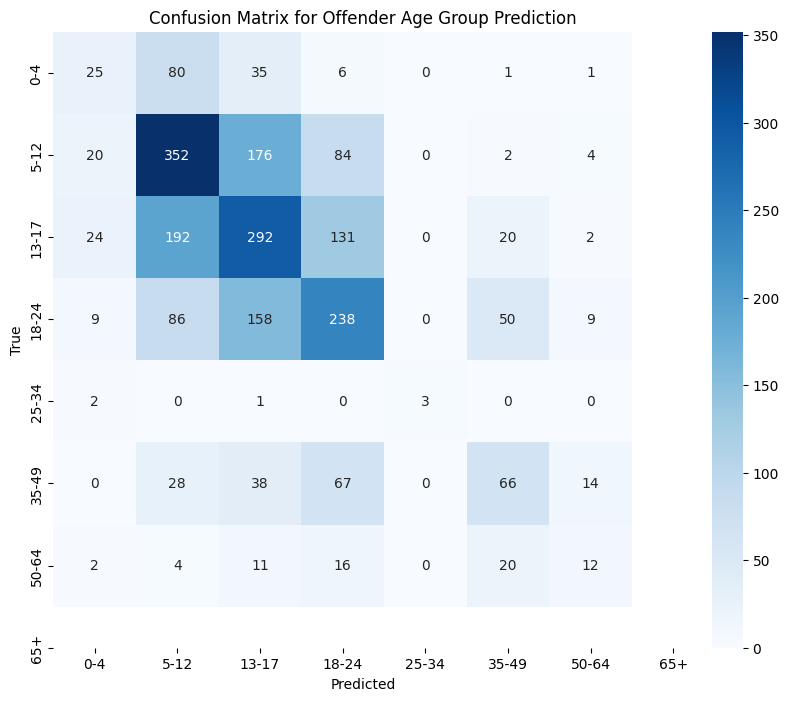

In [ ]:
bins = [0, 4, 12, 17, 24, 34, 49, 64, 120]  # upper bound is 120 to cover all possible ages
labels = ['0-4', '5-12', '13-17', '18-24', '25-34', '35-49', '50-64', '65+']
df_virginia_solved['OffenderAgeGroup'] = pd.cut(df_virginia_solved['OffenderAge'], bins=bins, labels=labels)

# identify needed features and target variables

features = ['VictimAge', 'VictimSex', 'VictimRace', 'WeaponUsed',
            'VictimOffenderRelationship', 'CrimeCircumstance',
            'CrimeSituation', 'HomicideType', 'AdditionalOffenderCount',
            'AdditionalVictimCount']
target = 'OffenderAgeGroup'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['VictimSex', 'VictimRace', 'WeaponUsed',
                        'VictimOffenderRelationship',
                         'HomicideType','CrimeCircumstance','CrimeSituation']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge', 'AdditionalOffenderCount', 'AdditionalVictimCount']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# train via randomforest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# evaluate outcome
y_pred = model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print(f'\nAccuracy score of the random forest classifier is {accuracy:.2f}%')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Offender Age Group Prediction')
plt.show()



## Finding out about the feature importance scores to determine which features are nice

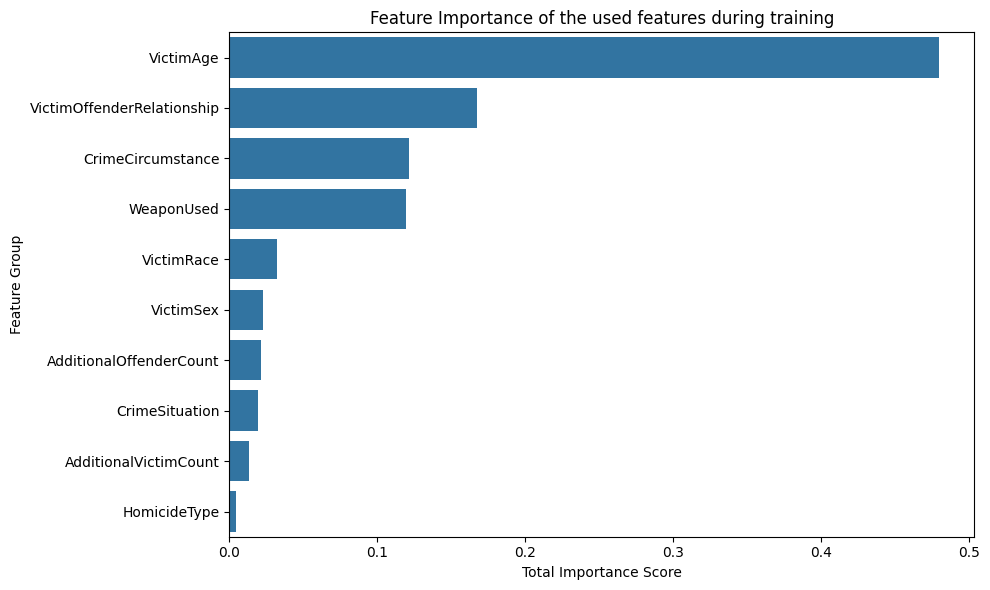

In [ ]:
feature_importances = model.feature_importances_
feature_names = X_final.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Grouping dummy variables back to their original feature
feature_importance_df['BaseFeature'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])

grouped_importance = feature_importance_df.groupby('BaseFeature')['Importance'].sum().reset_index()
grouped_importance = grouped_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='BaseFeature', data=grouped_importance)
plt.xlabel('Total Importance Score')
plt.ylabel('Feature Group')
plt.title('Feature Importance of the used features during training')
plt.tight_layout()
plt.show()


# Dropping certain features with low feature importance: Remaining features with high importance are as follows:
- Victim Age
- WeaponUsed
- CrimeCircumstance
- VictimOffenderRelationship

## Testing whether accuracy increased after low importance features have been dropped


Accuracy score of the random forest classifier is 42.26%


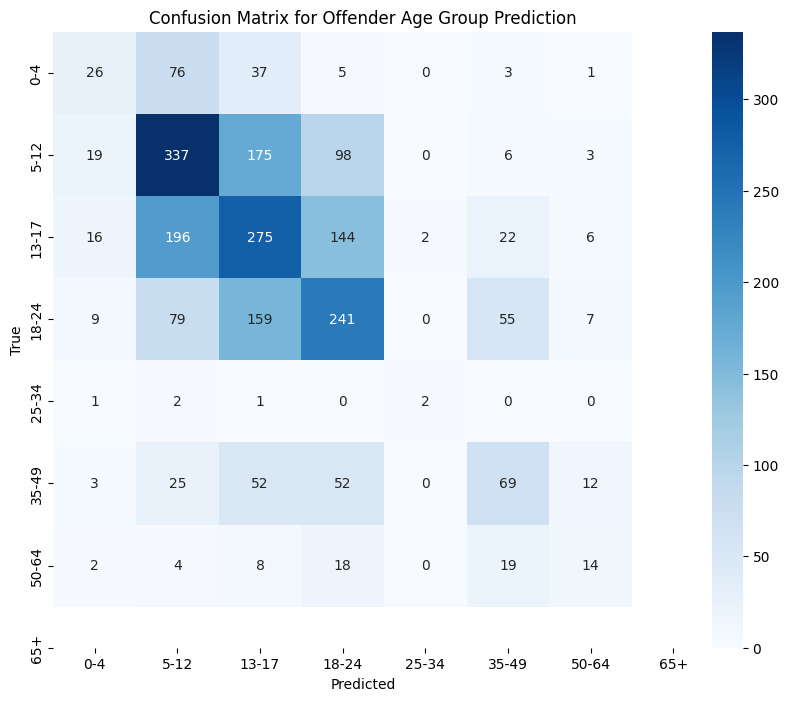

In [ ]:
bins = [0, 4, 12, 17, 24, 34, 49, 64, 120]  # upper bound is 120 to cover all possible ages
labels = ['0-4', '5-12', '13-17', '18-24', '25-34', '35-49', '50-64', '65+']
df_virginia_solved.loc[:, 'OffenderAgeGroup'] = pd.cut(df_virginia_solved['OffenderAge'], bins=bins, labels=labels)

# identify needed features and target variables

features = ['VictimAge', 'WeaponUsed',
            'VictimOffenderRelationship', 'CrimeCircumstance']
target = 'OffenderAgeGroup'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['WeaponUsed',
                        'VictimOffenderRelationship',
                        'CrimeCircumstance']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# train via randomforest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# evaluate outcome
y_pred = model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print(f'\nAccuracy score of the random forest classifier is {accuracy:.2f}%')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Offender Age Group Prediction')
plt.show()



## Fine tuning features with the best parameter combination previously found through grid-search

In [ ]:
final_model_chosen = RandomForestClassifier(
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)
final_model_chosen.fit(X_train, y_train)
y_pred = final_model_chosen.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy score of the RandomForestClassifier: {accuracy:.2f}%')

Accuracy score of the RandomForestClassifier: 43.88%


## Turns out that predicting age is quite challenging, even by classifying age groups

## Attempt to predict and impute age groups to the unsolved dataset

In [ ]:
X_unsolved_dummies = df_virginia_unsolved[categorical_features]
X_unsolved_encoded = pd.get_dummies(X_unsolved_dummies, drop_first=True)
X_unsolved_numeric = df_virginia_unsolved[['VictimAge']]

X_unsolved_final = pd.concat([X_unsolved_numeric, X_unsolved_encoded], axis=1)

# align features of the encoded dataset with the training set above so that prediction can be accurately carried out
def align_features(X_train, X_new):
    missing_cols = set(X_train.columns) - set(X_new.columns)
    for col in missing_cols:
        X_new[col] = 0
    extra_cols = set(X_new.columns) - set(X_train.columns)
    X_new = X_new.drop(columns=extra_cols)
    X_new = X_new[X_train.columns]
    return X_new
X_unsolved_final = align_features(X_final, X_unsolved_final)

# predict and fill in the predicted values
unsolved_predictions = model.predict(X_unsolved_final)
df_virginia_unsolved['Predicted_AgeGroup'] = unsolved_predictions
unsolved_probabilities = model.predict_proba(X_unsolved_final)
df_virginia_unsolved['Prob_13-17'] = np.round(unsolved_probabilities[:, 0], 2)*100
df_virginia_unsolved['Prob_18-24'] = np.round(unsolved_probabilities[:, 1], 2)*100
df_virginia_unsolved['Prob_25-34'] = np.round(unsolved_probabilities[:, 2], 2)*100
df_virginia_unsolved['Prob_35-49'] = np.round(unsolved_probabilities[:, 3], 2)*100
df_virginia_unsolved['Prob_5-12'] = np.round(unsolved_probabilities[:, 4], 2)*100
df_virginia_unsolved['Prob_50-64'] = np.round(unsolved_probabilities[:, 5], 2)*100
df_virginia_unsolved['Prob_65+'] = np.round(unsolved_probabilities[:, 6], 2)*100
print(model.classes_)
df_virginia_unsolved.iloc[:, 24:].head()


['13-17' '18-24' '25-34' '35-49' '5-12' '50-64' '65+']


,Predicted_OffenderSex,Prob_Male,Prob_Female,Predicted_OffenderRace,Prob_Black,Prob_White,Prob_Asian,Prob_American Indian or Alaskan Native,Predicted_AgeGroup,Prob_13-17,Prob_18-24,Prob_25-34,Prob_35-49,Prob_5-12,Prob_50-64,Prob_65+
845735,Female,45.0,55.0,White,33.0,67.0,0.0,0.0,18-24,0.0,72.0,23.0,2.0,0.0,3.0,0.0
848941,Male,97.0,3.0,White,37.0,53.0,10.0,0.0,18-24,3.0,82.0,10.0,4.0,0.0,1.0,0.0
849388,Male,97.0,3.0,White,13.0,87.0,0.0,0.0,25-34,1.0,28.0,54.0,10.0,0.0,7.0,1.0
849908,Male,96.0,4.0,White,29.0,68.0,3.0,0.0,25-34,2.0,23.0,71.0,4.0,0.0,0.0,0.0
850937,Male,99.0,1.0,Black,55.0,40.0,5.0,0.0,18-24,0.0,49.0,44.0,5.0,0.0,0.0,2.0


In [ ]:
df_virginia_unsolved['VictimOffenderRelationship'].value_counts()

,count
VictimOffenderRelationship,
Relationship not determined,32
Other - known to victim,2
Stranger,2
Other family,1


## Training another random forest classifier model to predict <b>victim offender relationship</b>

Accuracy score of the random forest classifier is 43.27%


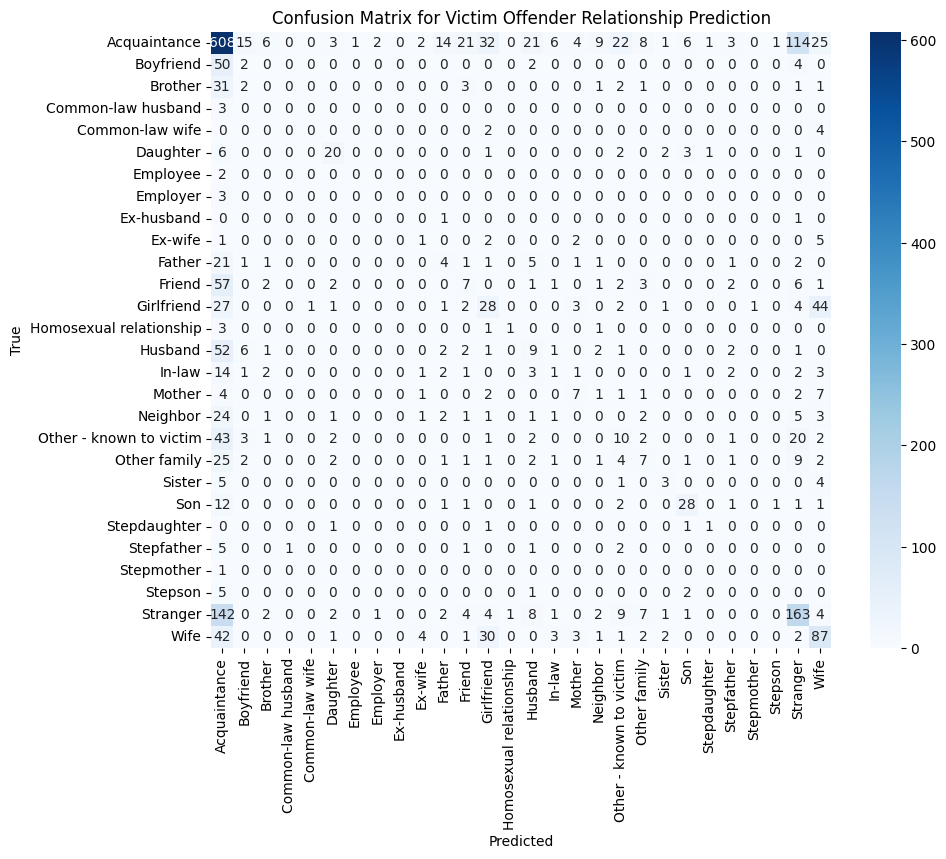

In [ ]:

features = ['VictimAge', 'VictimSex', 'VictimRace', 'WeaponUsed',
            'CrimeCircumstance', 'CrimeSituation', 'HomicideType']
target = 'VictimOffenderRelationship'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['VictimSex', 'VictimRace', 'WeaponUsed',
                         'HomicideType','CrimeCircumstance','CrimeSituation']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# train via randomforest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# evaluate outcome
y_pred = model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
relationship_labels = sorted(y_test.unique())
print(f'Accuracy score of the random forest classifier is {accuracy:.2f}%')
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=relationship_labels, yticklabels=relationship_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Victim Offender Relationship Prediction')
plt.show()



## Attempt to predict and impute data for the unsolved cases

In [ ]:
X_unsolved_dummies = df_virginia_unsolved[categorical_features]
X_unsolved_encoded = pd.get_dummies(X_unsolved_dummies, drop_first=True)
X_unsolved_numeric = df_virginia_unsolved[['VictimAge']]

X_unsolved_final = pd.concat([X_unsolved_numeric, X_unsolved_encoded], axis=1)

# align features of the encoded dataset with the training set above so that prediction can be accurately carried out
def align_features(X_train, X_new):
    missing_cols = set(X_train.columns) - set(X_new.columns)
    for col in missing_cols:
        X_new[col] = 0
    extra_cols = set(X_new.columns) - set(X_train.columns)
    X_new = X_new.drop(columns=extra_cols)
    X_new = X_new[X_train.columns]
    return X_new
X_unsolved_final = align_features(X_final, X_unsolved_final)

# predict and fill in the predicted values
unsolved_predictions = model.predict(X_unsolved_final)
df_virginia_unsolved['Predicted_VictimOffenderRelationship'] = unsolved_predictions
unsolved_probabilities = model.predict_proba(X_unsolved_final)
for idx, relationship_class in enumerate(model.classes_):
    df_virginia_unsolved[f'Prob_{relationship_class}'] = np.round(unsolved_probabilities[:, idx], 2)*100
print(model.classes_)
df_virginia_unsolved.iloc[:, 24:].head()


['Acquaintance' 'Boyfriend' 'Brother' 'Common-law husband'
 'Common-law wife' 'Daughter' 'Employee' 'Employer' 'Ex-husband' 'Ex-wife'
 'Father' 'Friend' 'Girlfriend' 'Homosexual relationship' 'Husband'
 'In-law' 'Mother' 'Neighbor' 'Other - known to victim' 'Other family'
 'Sister' 'Son' 'Stepdaughter' 'Stepfather' 'Stepmother' 'Stepson'
 'Stranger' 'Wife']


,Predicted_OffenderSex,Prob_Male,Prob_Female,Predicted_OffenderRace,Prob_Black,Prob_White,Prob_Asian,Prob_American Indian or Alaskan Native,Predicted_AgeGroup,Prob_13-17,...,Prob_Other - known to victim,Prob_Other family,Prob_Sister,Prob_Son,Prob_Stepdaughter,Prob_Stepfather,Prob_Stepmother,Prob_Stepson,Prob_Stranger,Prob_Wife
845735,Female,45.0,55.0,White,33.0,67.0,0.0,0.0,18-24,0.0,...,39.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
848941,Male,97.0,3.0,White,37.0,53.0,10.0,0.0,18-24,3.0,...,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17.0,0.0
849388,Male,97.0,3.0,White,13.0,87.0,0.0,0.0,25-34,1.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,18.0,0.0
849908,Male,96.0,4.0,White,29.0,68.0,3.0,0.0,25-34,2.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,27.0,0.0
850937,Male,99.0,1.0,Black,55.0,40.0,5.0,0.0,18-24,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0


In [ ]:
df_virginia_unsolved.iloc[:, 40:].head()

,Predicted_VictimOffenderRelationship,Prob_Acquaintance,Prob_Boyfriend,Prob_Brother,Prob_Common-law husband,Prob_Common-law wife,Prob_Daughter,Prob_Employee,Prob_Employer,Prob_Ex-husband,...,Prob_Other - known to victim,Prob_Other family,Prob_Sister,Prob_Son,Prob_Stepdaughter,Prob_Stepfather,Prob_Stepmother,Prob_Stepson,Prob_Stranger,Prob_Wife
845735,Acquaintance,46.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,...,39.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
848941,Acquaintance,53.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17.0,0.0
849388,Acquaintance,57.0,2.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,18.0,0.0
849908,Acquaintance,48.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,27.0,0.0
850937,Acquaintance,62.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0


In [ ]:
df_virginia_unsolved['Predicted_VictimOffenderRelationship'].value_counts()

,count
Predicted_VictimOffenderRelationship,
Acquaintance,32
Girlfriend,2
Son,1
Other - known to victim,1
Stranger,1


# Using geopy to geolocate the county names of the unsolved cases and visualize the suspect demographics

In [ ]:
import time
import folium

county_coords = {
    'Norfolk, VA': (36.8508, -76.2859),
    'Newport News, VA': (37.0871, -76.4730),
    'Prince William, VA': (38.7839, -77.6078),
    'Westmoreland, VA': (38.0938, -76.7981),
    'Alexandria, VA': (38.8048, -77.0469),
    'Richmond, VA': (37.5407, -77.4360),
    'Mecklenburg, VA': (36.6518, -78.3647),
    'Loudoun, VA': (39.0768, -77.6536),
    'Henrico, VA': (37.5056, -77.3320),
    'Hanover, VA': (37.7677, -77.3702),
    'Gloucester, VA': (37.4088, -76.5257),
    'Amherst, VA': (37.5859, -79.1097),
    'Hampton, VA': (37.0299, -76.3452),
    'Roanoke, VA': (37.2709, -79.9414)
}

df_virginia_unsolved['Coordinates'] = df_virginia_unsolved['CountyFIPS'].map(county_coords)
df_virginia_unsolved['Latitude'] = df_virginia_unsolved['Coordinates'].apply(lambda x: x[0] if pd.notnull(x) else None)
df_virginia_unsolved['Longitude'] = df_virginia_unsolved['Coordinates'].apply(lambda x: x[1] if pd.notnull(x) else None)

race_color = {
    'Black':'black',
    'White':'white',
    'Asian':'orange',
    'American India or Alaskan Native':'red'
}

m = folium.Map(location=[37.5, -78.7], zoom_start=7)
race_color = {
    'Black': 'black',
    'White': 'pink',
    'Asian': 'orange',
    'American Indian or Alaskan Native': 'red',
}


for idx, row in df_virginia_unsolved.iterrows():
    if pd.isnull(row['Latitude']) or pd.isnull(row['Longitude']):
        continue

    color = race_color.get(row['Predicted_OffenderRace'], 'gray')
    icon_type = 'male' if row['Predicted_OffenderSex'] == 'Male' else 'female'
    age = row['Predicted_AgeGroup']

    popup_text = (
        f"<b>Sex:</b> {row['Predicted_OffenderSex']}<br>"
        f"<b>Race:</b> {row['Predicted_OffenderRace']}<br>"
        f"<b>Age Group:</b> {age}<br>"
        f"<b>Victim Offender Relationship:</b> {row['Predicted_VictimOffenderRelationship']}"
    )

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color=color, icon=icon_type, prefix='fa')
    ).add_to(m)

m.save('virginia_predicted_offenders_map.html')

# Final HTML map that showcases the distribution of the unsolved cases across Virginia, as well as popups containing relevant demographic information regarding each potential suspect

- Pink: White
- Black: African American
- Orange: Asian
- Red: American Indian

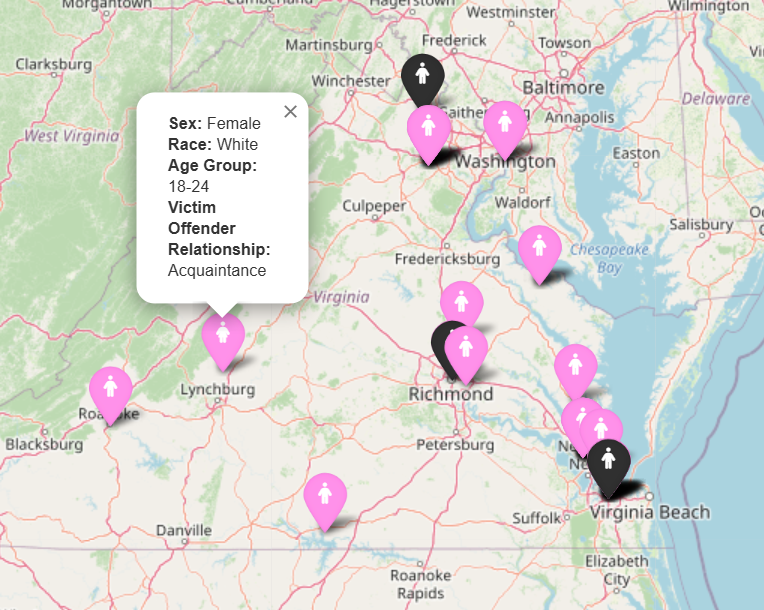

In [ ]:
from IPython.display import Image, display

display(Image('Demographic_Map.png'))

# Visualizing results of the predicted demographic

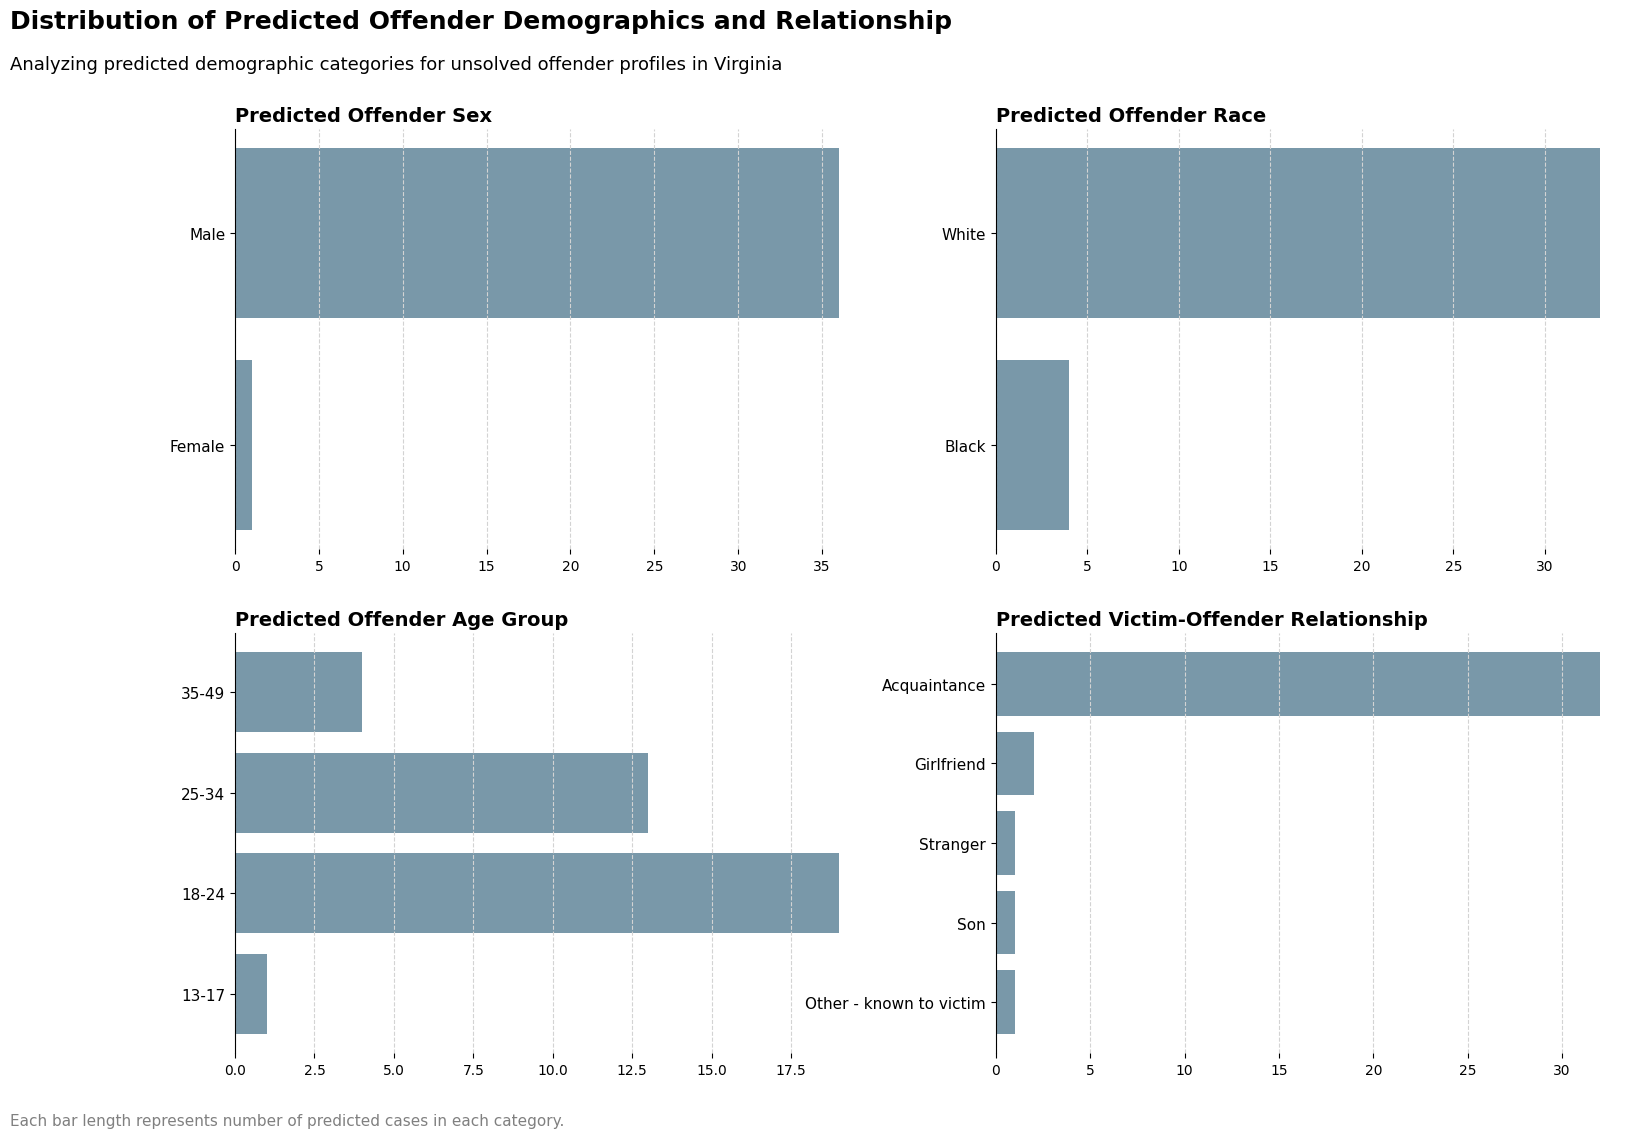

In [ ]:
bar_color = '#7998A9'  # Single color for all charts
bar_width = 0.6

sex_counts = df_virginia_unsolved['Predicted_OffenderSex'].value_counts().sort_values(ascending=True)

race_counts = df_virginia_unsolved['Predicted_OffenderRace'].value_counts().sort_values(ascending=True)

agegroup_order = ['0-4', '5-12', '13-17', '18-24', '25-34', '35-49', '50-64', '65+']
age_counts = df_virginia_unsolved['Predicted_AgeGroup'].value_counts().reindex(agegroup_order).dropna()

relationship_counts = df_virginia_unsolved['Predicted_VictimOffenderRelationship'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(18, 12))
plt.tight_layout()
plt.subplots_adjust(top=0.88)

plt.suptitle("Distribution of Predicted Offender Demographics and Relationship", fontsize=18, fontweight='bold', x=0.0, ha='left')
plt.figtext(0.0, 0.93, "Analyzing predicted demographic categories for unsolved offender profiles in Virginia", fontsize=13, ha='left')
plt.figtext(0.0, 0.05, "Each bar length represents number of predicted cases in each category.", fontsize=11, color='grey', ha='left')

ax1 = plt.subplot(2, 2, 1)
y1 = np.arange(len(sex_counts))
ax1.barh(y1, sex_counts.values, color=bar_color)
ax1.set_yticks(y1)
ax1.set_yticklabels(sex_counts.index, fontsize=11)
ax1.set_title('Predicted Offender Sex', fontsize=14, fontweight='bold', loc='left')
ax1.grid(axis='x', linestyle='--', color='lightgrey')

ax2 = plt.subplot(2, 2, 2)
y2 = np.arange(len(race_counts))
ax2.barh(y2, race_counts.values, color=bar_color)
ax2.set_yticks(y2)
ax2.set_yticklabels(race_counts.index, fontsize=11)
ax2.set_title('Predicted Offender Race', fontsize=14, fontweight='bold', loc='left')
ax2.grid(axis='x', linestyle='--', color='lightgrey')

ax3 = plt.subplot(2, 2, 3)
y3 = np.arange(len(age_counts))
ax3.barh(y3, age_counts.values, color=bar_color)
ax3.set_yticks(y3)
ax3.set_yticklabels(age_counts.index, fontsize=11)
ax3.set_title('Predicted Offender Age Group', fontsize=14, fontweight='bold', loc='left')
ax3.grid(axis='x', linestyle='--', color='lightgrey')

ax4 = plt.subplot(2, 2, 4)
y4 = np.arange(len(relationship_counts))
ax4.barh(y4, relationship_counts.values, color=bar_color)
ax4.set_yticks(y4)
ax4.set_yticklabels(relationship_counts.index, fontsize=11)
ax4.set_title('Predicted Victim-Offender Relationship', fontsize=14, fontweight='bold', loc='left')
ax4.grid(axis='x', linestyle='--', color='lightgrey')

for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.show()


In [ ]:
df_virginia_unsolved.to_csv('Suspect_Demographic_Prediction.csv')